In [546]:
# loading packages
# basic + dates 
import numpy as np
import pandas as pd
from pandas import datetime
from datetime import datetime

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns # advanced vizs
%matplotlib inline

# statistics
from statsmodels.distributions.empirical_distribution import ECDF

# time series analysis
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import warnings
warnings.filterwarnings("ignore")
import itertools

import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as sm
from statsmodels.tsa.stattools import adfuller
import itertools
from sklearn.metrics import  mean_squared_error
from pylab import rcParams
from statsmodels.distributions.empirical_distribution import ECDF
from   statsmodels.tsa.api             import ExponentialSmoothing, SimpleExpSmoothing, Holt

import statsmodels.tools.eval_measures as      em

from statsmodels.tsa.stattools import adfuller
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

In [484]:
# importing data
df1 = pd.read_csv("Rose.csv", parse_dates = True, index_col = 'YearMonth')
df2=pd.read_csv("Sparkling.csv", parse_dates = True, index_col = 'YearMonth')

In [485]:
df1.head()

,Rose
YearMonth,
1980-01-01,112.0
1980-02-01,118.0
1980-03-01,129.0
1980-04-01,99.0
1980-05-01,116.0


In [486]:
df2.head()

,Sparkling
YearMonth,
1980-01-01,1686
1980-02-01,1591
1980-03-01,2304
1980-04-01,1712
1980-05-01,1471


In [487]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rose    185 non-null    float64
dtypes: float64(1)
memory usage: 2.9 KB


In [488]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Sparkling  187 non-null    int64
dtypes: int64(1)
memory usage: 2.9 KB


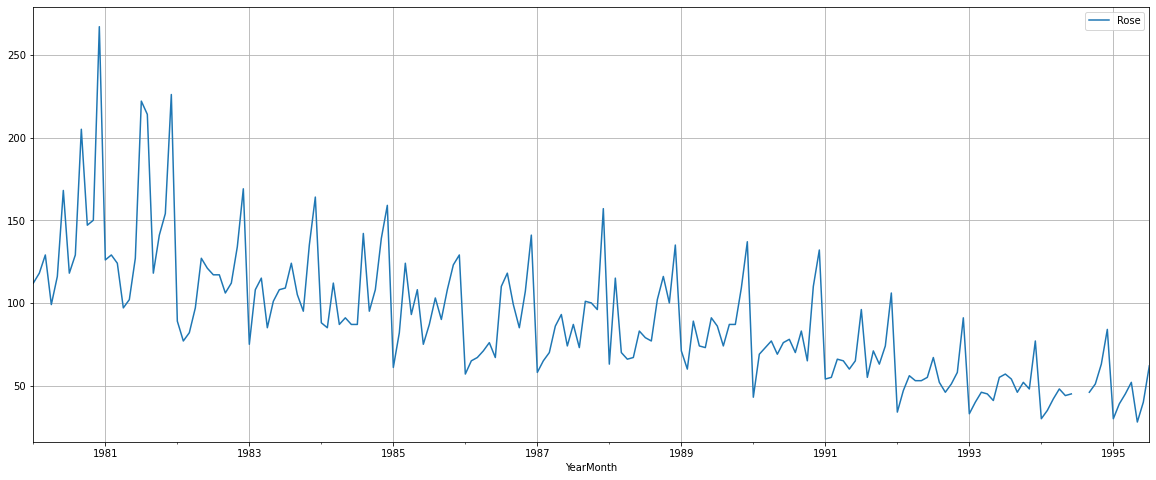

In [489]:
#Time series plot 1
df1.plot(figsize=(20,8))
plt.grid();

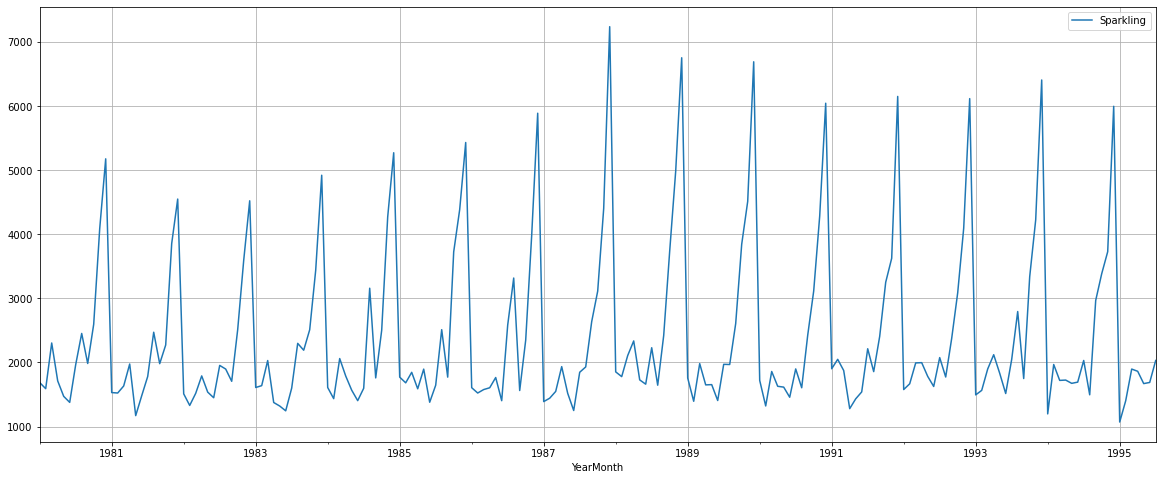

In [490]:
#Time series plot 2
df2.plot(figsize=(20,8))
plt.grid();

In [491]:
round(df1.describe(),3)

,Rose
count,185.000
mean,90.395
std,39.175
min,28.000
25%,63.000
50%,86.000
75%,112.000
max,267.000


In [492]:
round(df2.describe(),3)

,Sparkling
count,187.000
mean,2402.417
std,1295.112
min,1070.000
25%,1605.000
50%,1874.000
75%,2549.000
max,7242.000


In [493]:
df1[df1.isna().any(axis=1)]


,Rose
YearMonth,
1994-07-01,NaN
1994-08-01,NaN


In [494]:
df1['1994']

,Rose
YearMonth,
1994-01-01,30.0
1994-02-01,35.0
1994-03-01,42.0
1994-04-01,48.0
1994-05-01,44.0
1994-06-01,45.0
1994-07-01,NaN
1994-08-01,NaN
1994-09-01,46.0


In [495]:
df1['1994']=df1['1994'].interpolate()
df1['1994']

,Rose
YearMonth,
1994-01-01,30.000000
1994-02-01,35.000000
1994-03-01,42.000000
1994-04-01,48.000000
1994-05-01,44.000000
1994-06-01,45.000000
1994-07-01,45.333333
1994-08-01,45.666667
1994-09-01,46.000000


In [496]:
df2.isna().sum()

Sparkling    0
dtype: int64

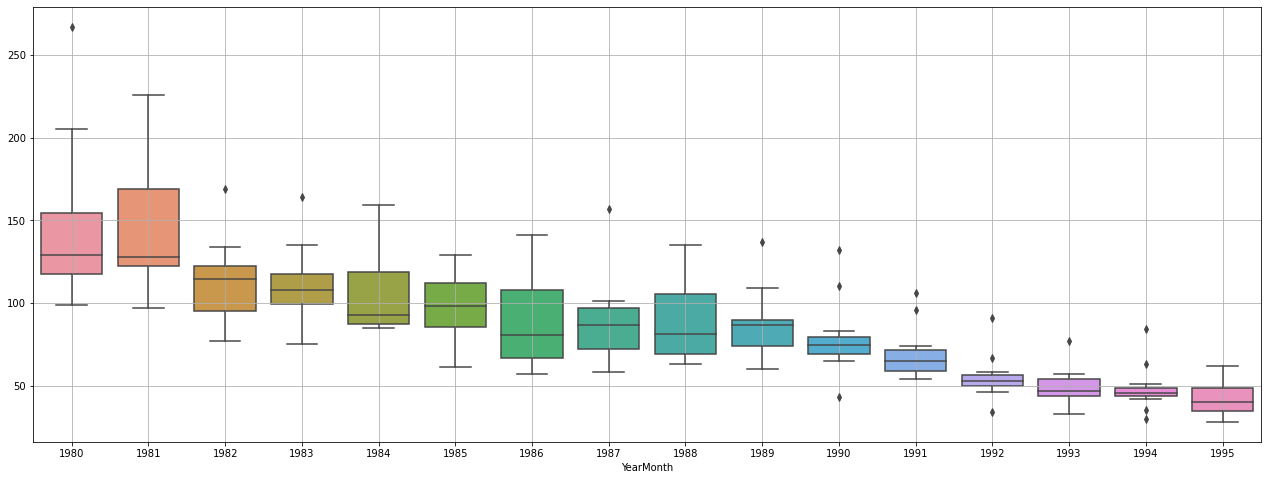

In [498]:
# Yearly box blot
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = df1.index.year,y = df1.values[:,0],ax=ax)
plt.grid();

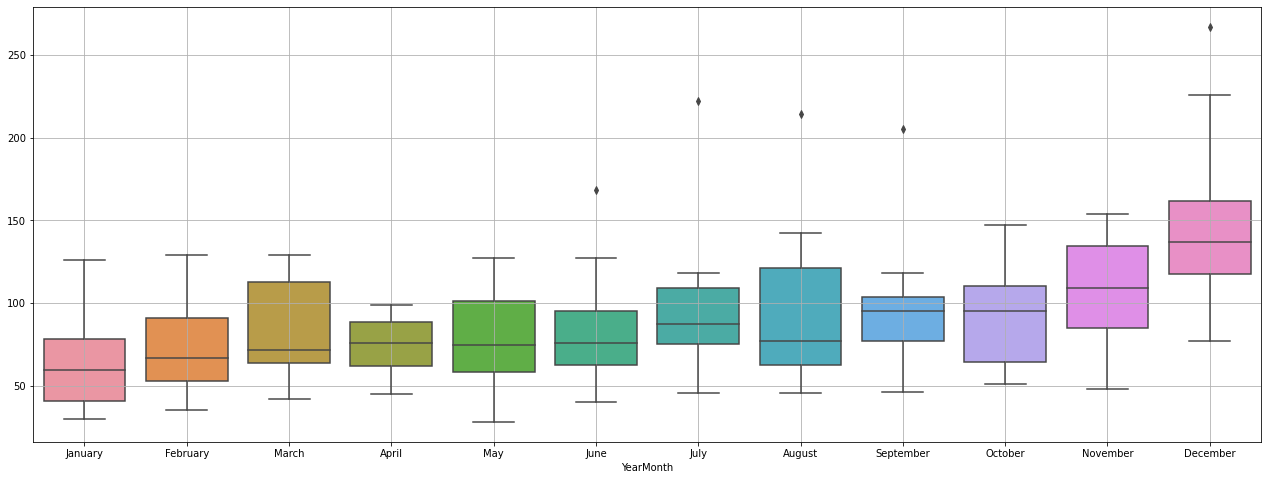

In [499]:
#Monthly box plot 1
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = df1.index.month_name(),y = df1.values[:,0],ax=ax)
plt.grid();

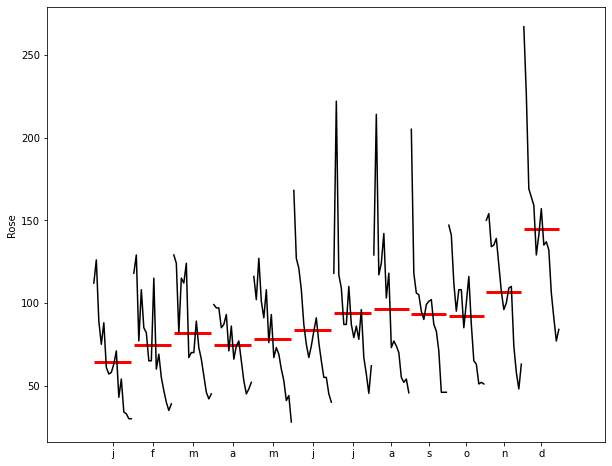

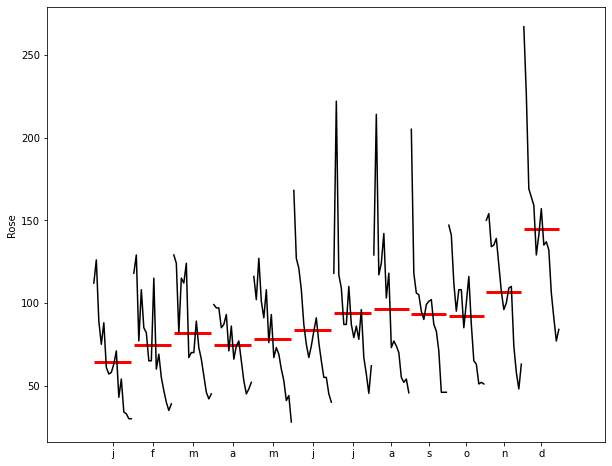

In [500]:
from statsmodels.graphics.tsaplots import month_plot
rcParams['figure.figsize'] = 10,8
#Monthly plot to understand the spread of Rose sales across the years
month_plot(df1['Rose'],ylabel='Rose')


YearMonth  April      August  December  February  January        July   June  \
YearMonth                                                                      
1980        99.0  129.000000     267.0     118.0    112.0  118.000000  168.0   
1981        97.0  214.000000     226.0     129.0    126.0  222.000000  127.0   
1982        97.0  117.000000     169.0      77.0     89.0  117.000000  121.0   
1983        85.0  124.000000     164.0     108.0     75.0  109.000000  108.0   
1984        87.0  142.000000     159.0      85.0     88.0   87.000000   87.0   
1985        93.0  103.000000     129.0      82.0     61.0   87.000000   75.0   
1986        71.0  118.000000     141.0      65.0     57.0  110.000000   67.0   
1987        86.0   73.000000     157.0      65.0     58.0   87.000000   74.0   
1988        66.0   77.000000     135.0     115.0     63.0   79.000000   83.0   
1989        74.0   74.000000     137.0      60.0     71.0   86.000000   91.0   
1990        77.0   70.000000     132.0  

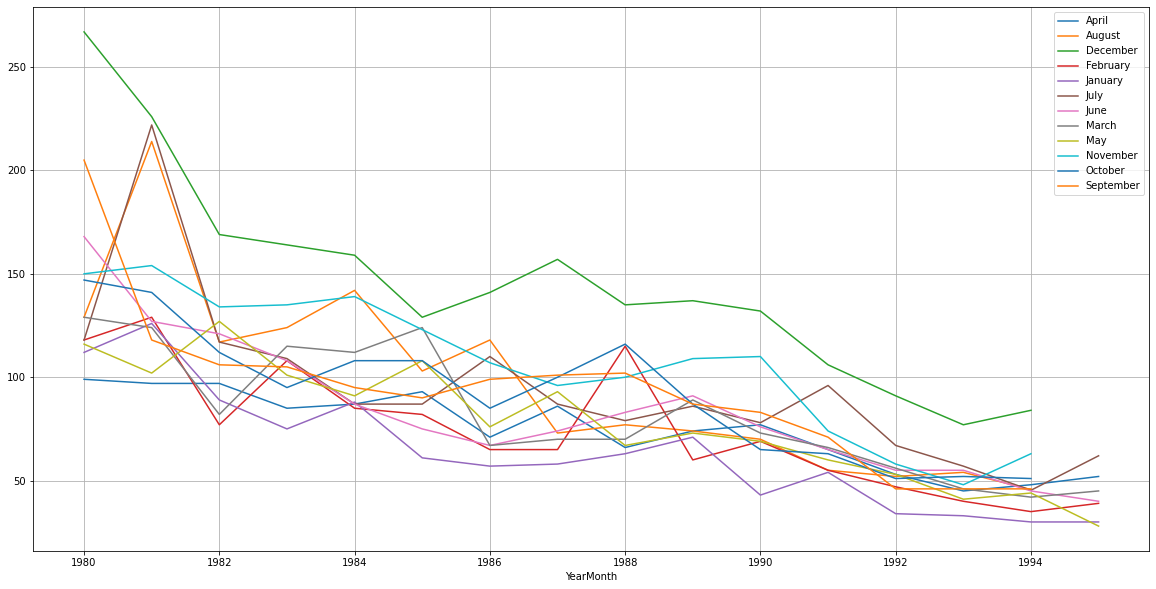

In [501]:
monthly_rose_sales_across_years = pd.pivot_table(df1, values = 'Rose', columns = df1.index.month_name(), index = df1.index.year)
print(monthly_rose_sales_across_years)
monthly_rose_sales_across_years.plot(figsize=(20,10))
plt.grid()
plt.legend(loc='best');

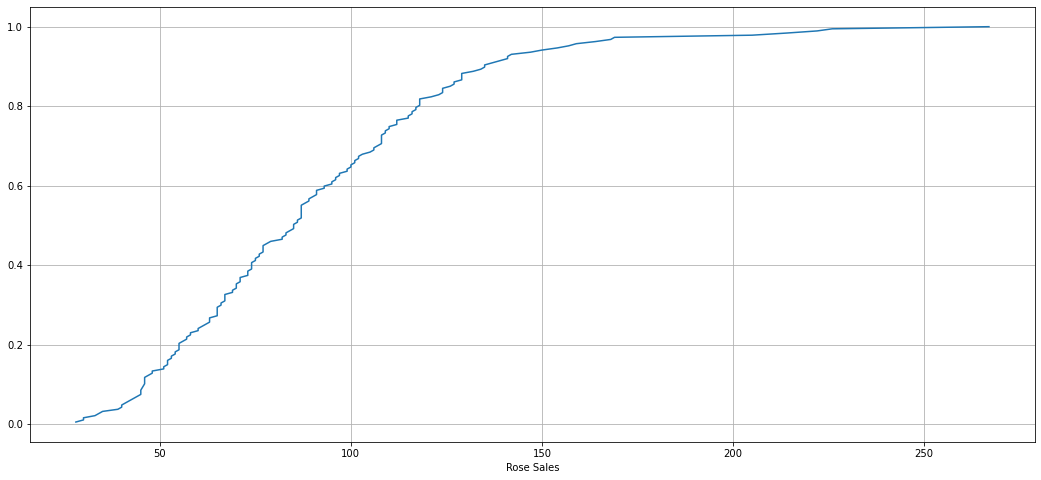

In [502]:
# statistics

plt.figure(figsize = (18, 8))
cdf = ECDF(df1['Rose'])
plt.plot(cdf.x, cdf.y, label = "statmodels");
plt.grid()
plt.xlabel('Rose Sales');

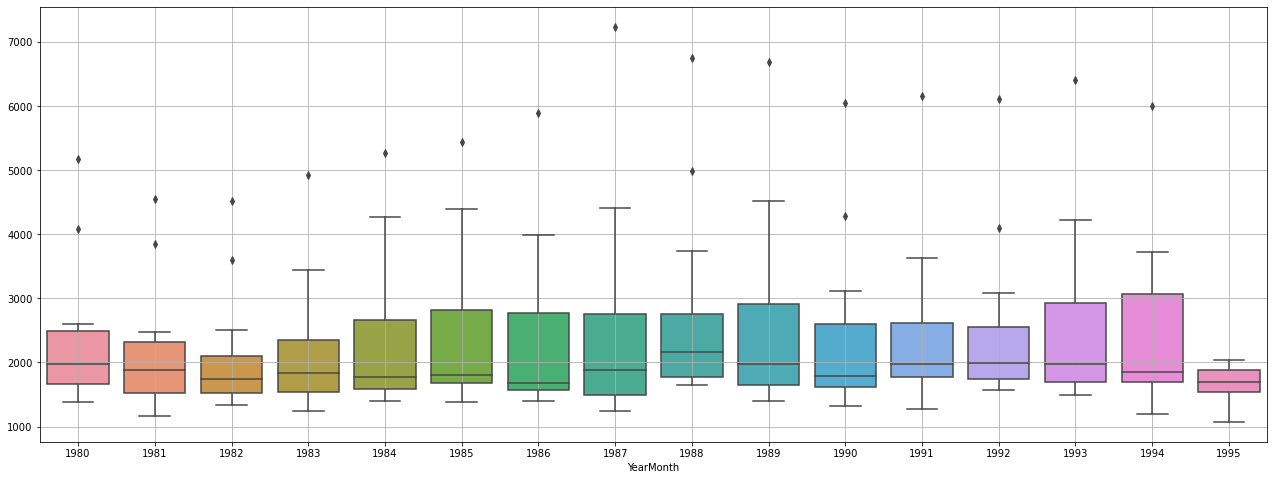

In [503]:
#Yearly box plot
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = df2.index.year,y = df2.values[:,0],ax=ax)
plt.grid();

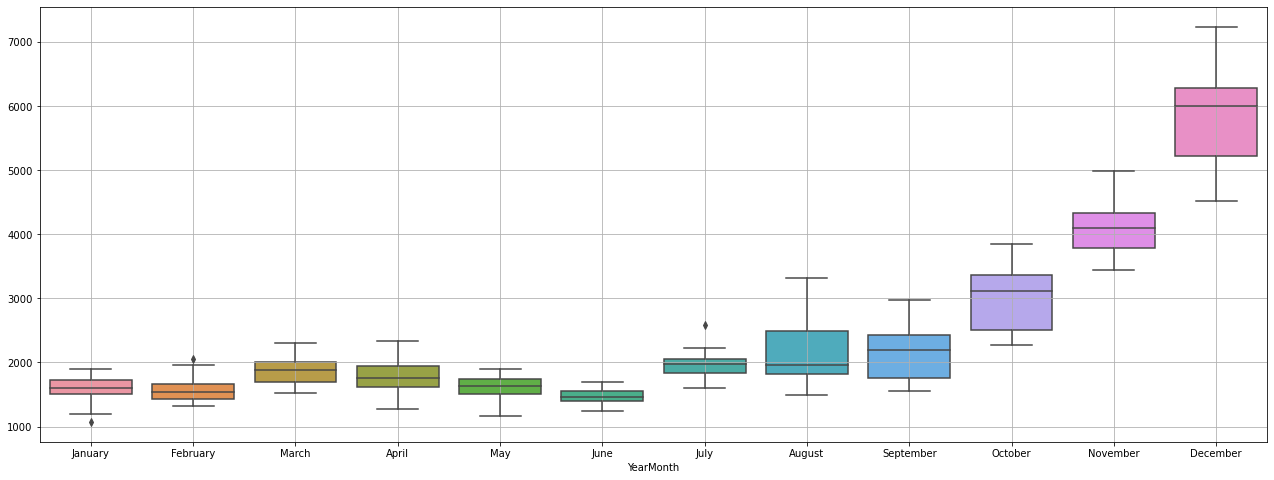

In [504]:
#Monthly box plot 2 
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = df2.index.month_name(),y = df2.values[:,0],ax=ax)
plt.grid();

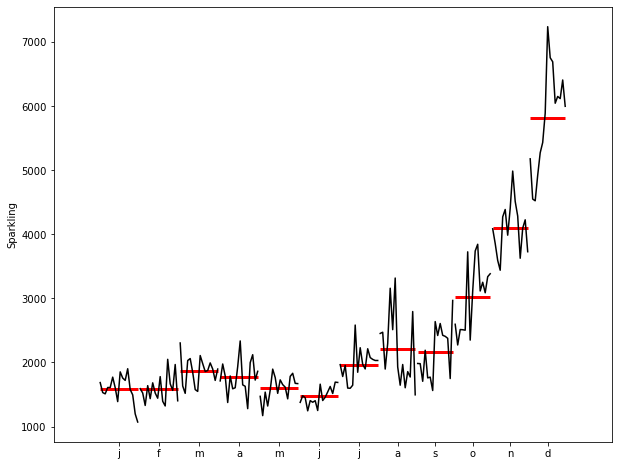

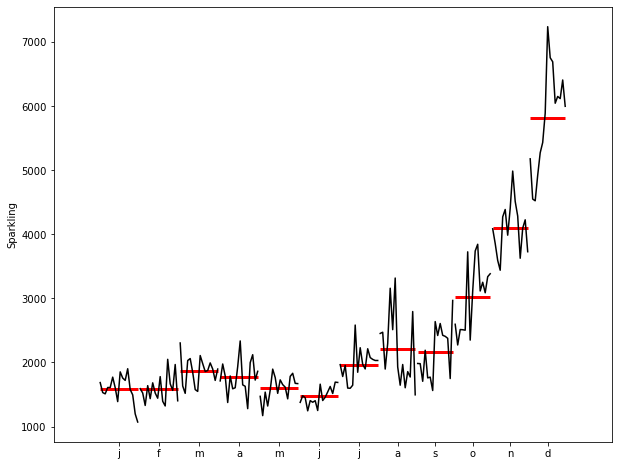

In [505]:
rcParams['figure.figsize'] = 10,8
#Monthly plot to understand the spread of Sparkling sales across the years
month_plot(df2['Sparkling'],ylabel='Sparkling')

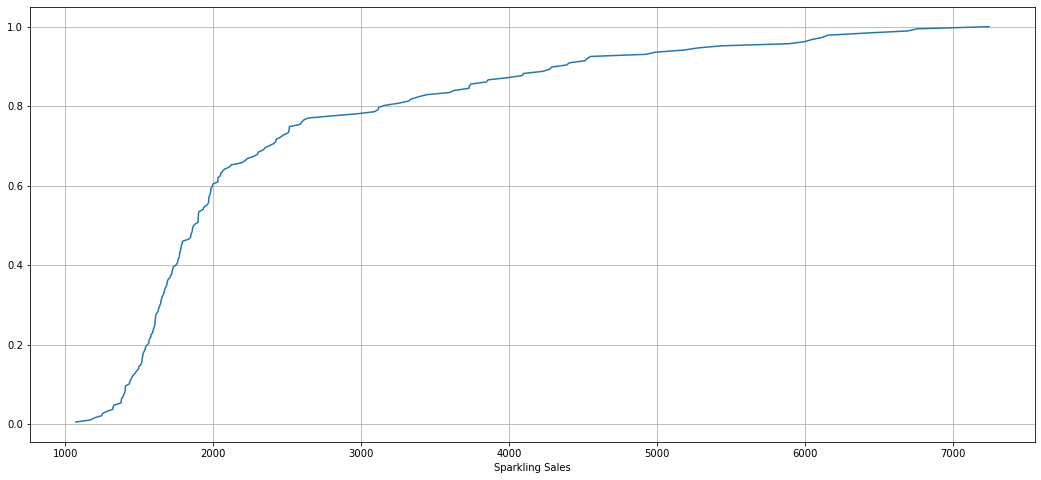

In [506]:
# statistics

plt.figure(figsize = (18, 8))
cdf = ECDF(df2['Sparkling'])
plt.plot(cdf.x, cdf.y, label = "statmodels");
plt.grid()
plt.xlabel('Sparkling Sales');

In [507]:
monthly_sparkling_sales_across_years = pd.pivot_table(df2, values = 'Sparkling', columns = df2.index.month_name(), index = df2.index.year)
print(monthly_sparkling_sales_across_years)


YearMonth   April  August  December  February  January    July    June  \
YearMonth                                                                
1980       1712.0  2453.0    5179.0    1591.0   1686.0  1966.0  1377.0   
1981       1976.0  2472.0    4551.0    1523.0   1530.0  1781.0  1480.0   
1982       1790.0  1897.0    4524.0    1329.0   1510.0  1954.0  1449.0   
1983       1375.0  2298.0    4923.0    1638.0   1609.0  1600.0  1245.0   
1984       1789.0  3159.0    5274.0    1435.0   1609.0  1597.0  1404.0   
1985       1589.0  2512.0    5434.0    1682.0   1771.0  1645.0  1379.0   
1986       1605.0  3318.0    5891.0    1523.0   1606.0  2584.0  1403.0   
1987       1935.0  1930.0    7242.0    1442.0   1389.0  1847.0  1250.0   
1988       2336.0  1645.0    6757.0    1779.0   1853.0  2230.0  1661.0   
1989       1650.0  1968.0    6694.0    1394.0   1757.0  1971.0  1406.0   
1990       1628.0  1605.0    6047.0    1321.0   1720.0  1899.0  1457.0   
1991       1279.0  1857.0    6153.0   

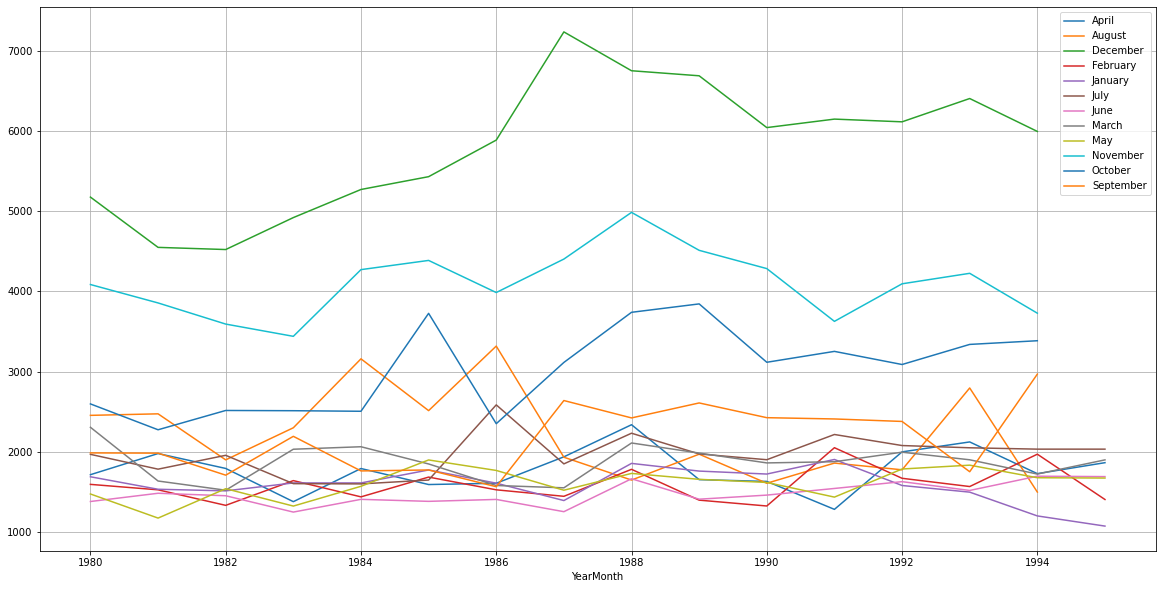

In [508]:
monthly_sparkling_sales_across_years.plot(figsize=(20,10))
plt.grid()
plt.legend(loc='best');

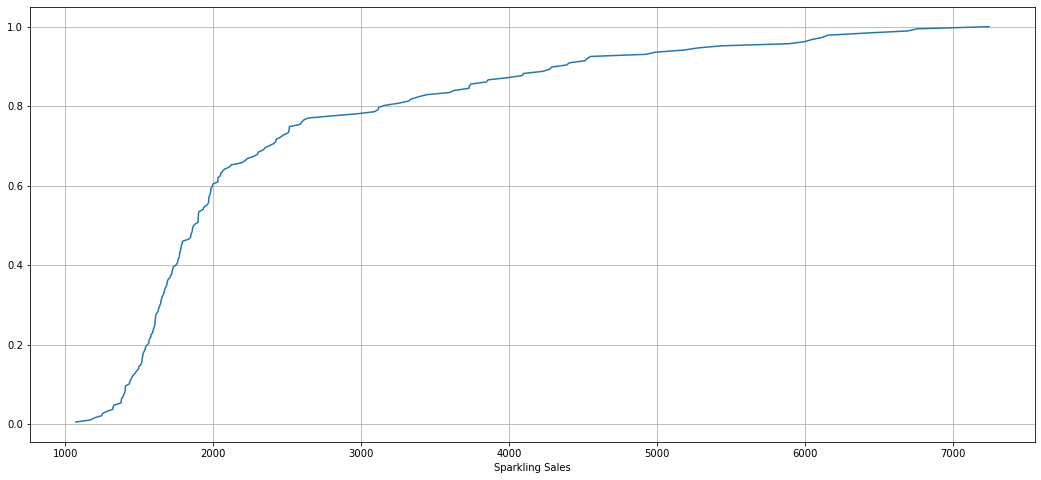

In [509]:
# statistics

plt.figure(figsize = (18, 8))
cdf = ECDF(df2['Sparkling'])
plt.plot(cdf.x, cdf.y, label = "statmodels");
plt.grid()
plt.xlabel('Sparkling Sales');

<Figure size 1296x576 with 0 Axes>

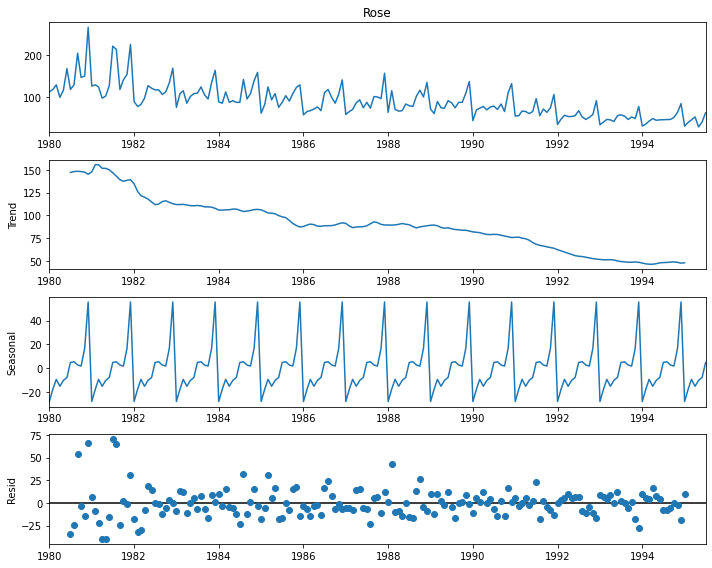

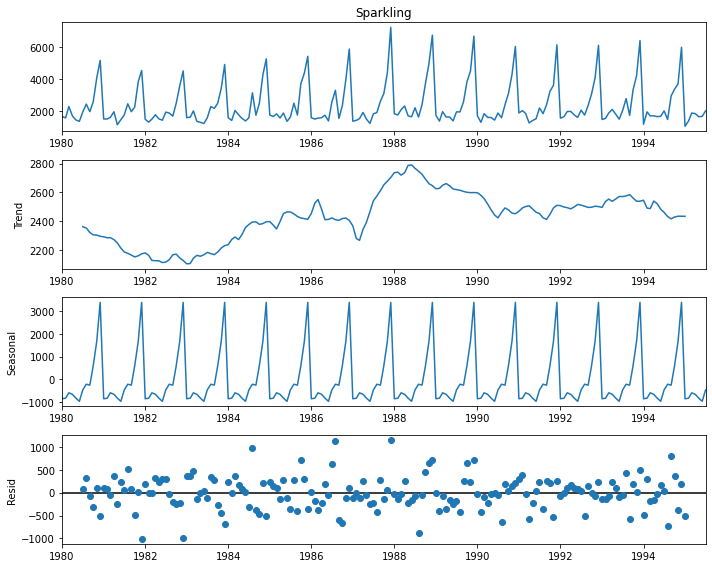

In [510]:
# Decomposition
plt.figure(figsize = (18, 8))
decomposition_rose = seasonal_decompose(df1['Rose'],model='additive')
decomposition_rose.plot();
plt.show()

decomposition_sparkling = seasonal_decompose(df2['Sparkling'],model='additive')
decomposition_sparkling.plot();
plt.show()



In [511]:
rose_train=df1[df1.index.year < 1991]
rose_test=df1[df1.index.year >= 1991]

len(rose_train)

132

In [512]:
rose_train_time = [i+1 for i in range(len(rose_train))]
rose_test_time = [i+131 for i in range(len(rose_test))]

print('Rose Training Time instance','\n',rose_train_time)
print('Rose Test Time instance','\n',rose_test_time)

Rose Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Rose Test Time instance 
 [131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185]


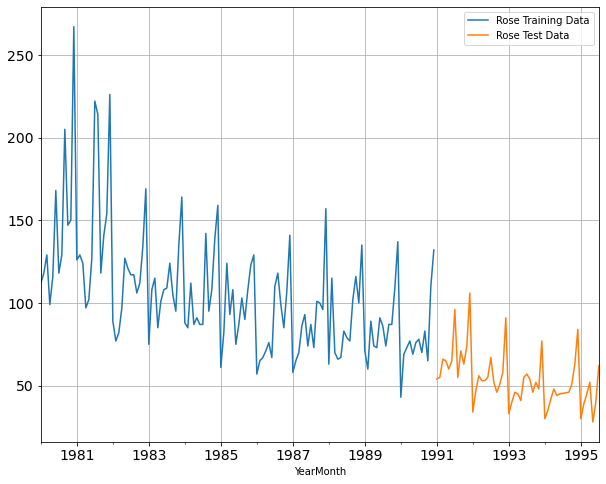

In [513]:
rose_train['Rose'].plot(fontsize=14)
rose_test['Rose'].plot(fontsize=14)
plt.grid()
plt.legend(['Rose Training Data','Rose Test Data'])
plt.show()

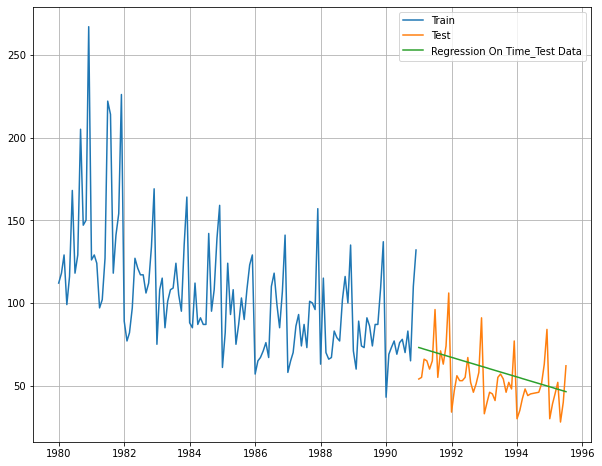

In [514]:
LinearRegression_train = rose_train.copy()
LinearRegression_test = rose_test.copy()
LinearRegression_train['time'] = rose_train_time
LinearRegression_test['time'] = rose_test_time

lr = LinearRegression()
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Rose'])

train_predictions_model1         = lr.predict(LinearRegression_train[['time']])
LinearRegression_train['RegOnTime'] = train_predictions_model1

test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.plot( rose_train['Rose'], label='Train')
plt.plot(rose_test['Rose'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')

plt.legend(loc='best')
plt.grid();

In [515]:
test_lr_rmse = metrics.mean_squared_error(rose_test['Rose'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 15.612


In [516]:
resultsDf=pd.DataFrame()
temp_resultsDf = pd.DataFrame({'RMSE': [test_lr_rmse]}
                           ,index=['Linear Regression'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

,RMSE
Linear Regression,15.611866


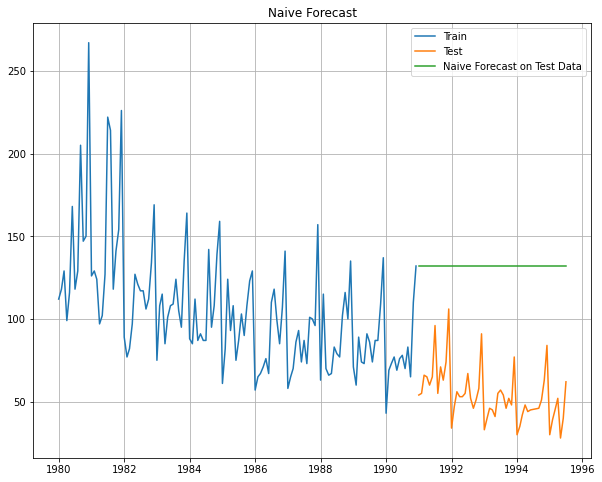

In [517]:
NaiveModel_train = rose_train.copy()
NaiveModel_test = rose_test.copy()

NaiveModel_test['naive'] = np.asarray(rose_train['Rose'])[len(np.asarray(rose_train['Rose']))-1]
NaiveModel_test['naive'].head()

plt.plot(NaiveModel_train['Rose'], label='Train')
plt.plot(rose_test['Rose'], label='Test')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

In [518]:
test_naive_rmse = metrics.mean_squared_error(rose_test['Rose'],NaiveModel_test['naive'],squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test))
temp_resultsDf = pd.DataFrame({'RMSE': [test_naive_rmse]}
                           ,index=['Naive Model'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

For RegressionOnTime forecast on the Test Data,  RMSE is 79.719


,RMSE
Linear Regression,15.611866
Naive Model,79.718773


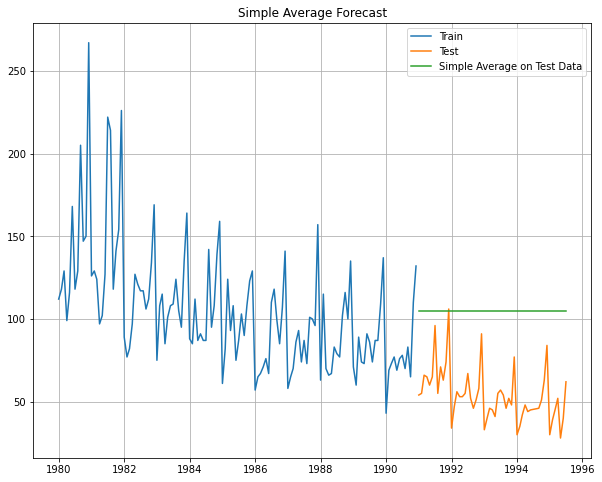

In [519]:
SimpleAverage_train = rose_train.copy()
SimpleAverage_test = rose_test.copy()

SimpleAverage_test['mean_forecast'] = rose_train['Rose'].mean()
SimpleAverage_test.head()

plt.plot(SimpleAverage_train['Rose'], label='Train')
plt.plot(SimpleAverage_test['Rose'], label='Test')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

In [520]:
rmse_model3_test = metrics.mean_squared_error(rose_test['Rose'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))
temp_resultsDf = pd.DataFrame({'RMSE': [rmse_model3_test]}
                           ,index=['Simple Average'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

For Simple Average forecast on the Test Data,  RMSE is 53.461


,RMSE
Linear Regression,15.611866
Naive Model,79.718773
Simple Average,53.460570


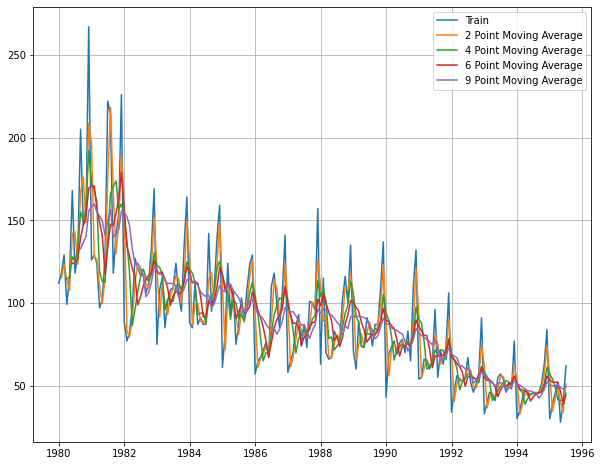

In [521]:
MovingAverage = df1.copy()
MovingAverage.head()

MovingAverage['Trailing_2'] = MovingAverage['Rose'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Rose'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Rose'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Rose'].rolling(9).mean()

MovingAverage.head()

## Plotting on the whole data

plt.plot(MovingAverage['Rose'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

#Creating train and test set 
trailing_MovingAverage_train=MovingAverage[MovingAverage.index.year < 1991] 
trailing_MovingAverage_test=MovingAverage[MovingAverage.index.year >= 1991]


For 2 point Moving Average Model forecast on the Training Data,  RMSE is 11.529
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 14.451
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 14.566
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 14.728


,RMSE
Linear Regression,15.611866
Naive Model,79.718773
Simple Average,53.460570
Moving Average - rolling 2,11.529278
Movinbg Average - rolling 4,14.451403
Moving Average - rolling 6,14.566327
Moving Average - rolling 9,14.727630


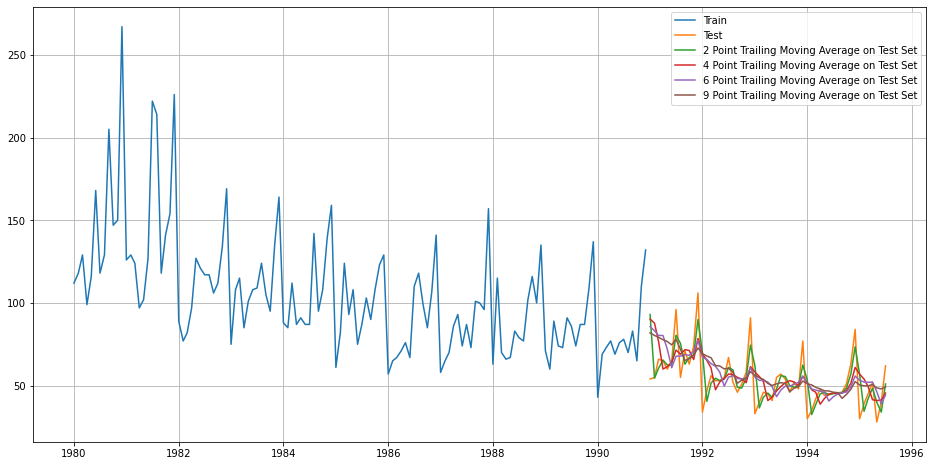

In [522]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Rose'], label='Train')
plt.plot(trailing_MovingAverage_test['Rose'], label='Test')


plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')

plt.legend(loc = 'best')
plt.grid();

## Test Data - RMSE  --> 2 point Trailing MA

rmse_model4_test_2 = metrics.mean_squared_error(rose_test['Rose'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_2))

## Test Data - RMSE --> 4 point Trailing MA

rmse_model4_test_4 = metrics.mean_squared_error(rose_test['Rose'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_model4_test_6 = metrics.mean_squared_error(rose_test['Rose'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_6))

## Test Data - RMSE --> 9 point Trailing MA

rmse_model4_test_9 = metrics.mean_squared_error(rose_test['Rose'],trailing_MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_9))

temp_resultsDf = pd.DataFrame({'RMSE': [rmse_model4_test_2]}
                           ,index=['Moving Average - rolling 2'])

resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

temp_resultsDf = pd.DataFrame({'RMSE': [rmse_model4_test_4]}
                           ,index=['Movinbg Average - rolling 4'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

temp_resultsDf = pd.DataFrame({'RMSE': [rmse_model4_test_6]}
                           ,index=['Moving Average - rolling 6'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

temp_resultsDf = pd.DataFrame({'RMSE': [rmse_model4_test_9]}
                           ,index=['Moving Average - rolling 9'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

In [523]:
trailing_MovingAverage_train.head(15)

,Rose,Trailing_2,Trailing_4,Trailing_6,Trailing_9
YearMonth,,,,,
1980-01-01,112.0,NaN,NaN,NaN,NaN
1980-02-01,118.0,115.0,NaN,NaN,NaN
1980-03-01,129.0,123.5,NaN,NaN,NaN
1980-04-01,99.0,114.0,114.50,NaN,NaN
1980-05-01,116.0,107.5,115.50,NaN,NaN
1980-06-01,168.0,142.0,128.00,123.666667,NaN
1980-07-01,118.0,143.0,125.25,124.666667,NaN
1980-08-01,129.0,123.5,132.75,126.500000,NaN
1980-09-01,205.0,167.0,155.00,139.166667,132.666667


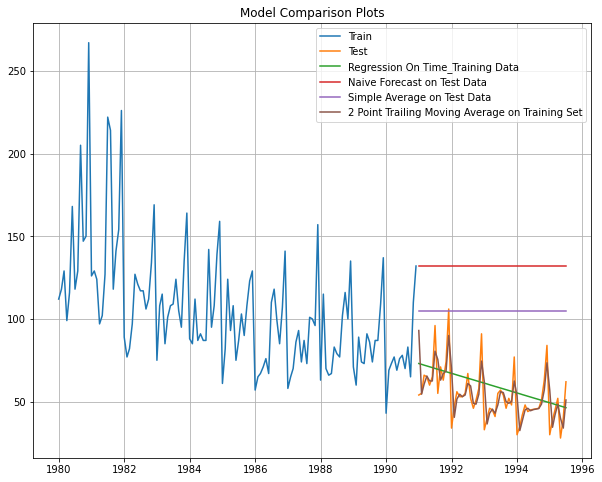

In [524]:

plt.plot(rose_train['Rose'], label='Train')
plt.plot(rose_test['Rose'], label='Test')

plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Training Data')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')


plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

In [525]:
df1_SES=df1.copy()
# df1_SES['Rose']=np.log(df1['Rose']) 
rose_log_train=df1_SES[df1_SES.index.year < 1991]
rose_log_test=df1_SES[df1_SES.index.year >= 1991]
df1_SES.head()

,Rose
YearMonth,
1980-01-01,112.0
1980-02-01,118.0
1980-03-01,129.0
1980-04-01,99.0
1980-05-01,116.0


In [526]:
model_SES = SimpleExpSmoothing(rose_log_train,initialization_method='estimated')
model_SES_autofit = model_SES.fit(optimized=True)
model_SES_autofit.params


{'smoothing_level': 0.09874933517484011,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 134.38703609891138,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [581]:
SES_predict = model_SES_autofit.forecast(steps=len(rose_log_test))


In [583]:
test_ses_rmse=mean_squared_error(rose_log_test.values,SES_predict.values,squared=False)
print('SES RMSE:',test_ses_rmse)
#different way to calculate RMSE
test_ses_rmse=em.rmse(rose_log_test.values,SES_predict.values)[0]
print('SES RMSE (calculated using statsmodels):',test_ses_rmse)



SES RMSE: 36.79622798367751
SES RMSE (calculated using statsmodels): 36.796227983677504


In [605]:
temp_resultsDf = pd.DataFrame({'RMSE': [test_ses_rmse]}
                           ,index=['Simple Exponential Smoothing, alpha-0.09'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

,RMSE
Linear Regression,15.611866
Naive Model,79.718773
Simple Average,53.460570
Moving Average - rolling 2,11.529278
Movinbg Average - rolling 4,14.451403
...,...
Alpha:0.8 Simple Exponential Smoothing,73.773992
Alpha:0.9 Simple Exponential Smoothing,77.139276
"Simple Exponential Smoothing, alpha-0.3",47.504821
Double Exponential Smoothing,265.567594


In [574]:
model_SES = SimpleExpSmoothing(rose_log_train,initialization_method='estimated')
temp_resultsDf=pd.DataFrame(columns=['RMSE'])
temp_resultsDf2=pd.DataFrame(columns=['RMSE'])
for i in np.arange(0.3,1,0.1):
    model_SES_alpha_i = model_SES.fit(smoothing_level=i,optimized=False,use_brute=True)
    SES_predict = model_SES_alpha_i.forecast(steps=len(rose_log_test))
    test_ses_rmse=em.rmse(rose_log_test.values,SES_predict.values)[0]
    index_1='Alpha:'+str(round(i,2))+' Single Exponential Smoothing'
    temp_resultsDf2 = pd.DataFrame({'RMSE': [test_ses_rmse]}
                           ,index=[index_1])


    temp_resultsDf= pd.concat([temp_resultsDf,temp_resultsDf2])
    
temp_resultsDf.sort_values(by=['RMSE']).head()

,RMSE
Alpha:0.3 Single Exponential Smoothing,47.504821
Alpha:0.4 Single Exponential Smoothing,53.767406
Alpha:0.5 Single Exponential Smoothing,59.641786
Alpha:0.6 Single Exponential Smoothing,64.971288
Alpha:0.7 Single Exponential Smoothing,69.698162


In [579]:
#Perform manual fit for Single Exponential smoothing based on above findings
model_SES = SimpleExpSmoothing(rose_log_train,initialization_method='estimated')
model_SES_manual_fit=model_SES.fit(smoothing_level=0.3,optimized=False,use_brute=True)
model_SES_manual_fit.params
SES_predict = model_SES_manual_fit.forecast(steps=len(rose_log_test))

test_ses_rmse=mean_squared_error(rose_log_test.values,SES_predict.values,squared=False)
print('SES RMSE:',test_ses_rmse)
#different way to calculate RMSE
test_ses_rmse=em.rmse(rose_log_test.values,SES_predict.values)[0]
print('SES RMSE (calculated using statsmodels):',test_ses_rmse)


SES RMSE: 47.50482096446942
SES RMSE (calculated using statsmodels): 47.50482096446942


,RMSE
Linear Regression,15.611866
Naive Model,79.718773
Simple Average,53.460570
Moving Average - rolling 2,11.529278
Movinbg Average - rolling 4,14.451403
...,...
Alpha:0.6 Simple Exponential Smoothing,64.971288
Alpha:0.7 Simple Exponential Smoothing,69.698162
Alpha:0.8 Simple Exponential Smoothing,73.773992
Alpha:0.9 Simple Exponential Smoothing,77.139276


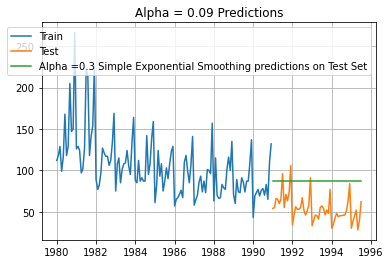

In [582]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(rose_log_train, label='Train')
plt.plot(rose_log_test, label='Test')

plt.plot(SES_predict, label='Alpha =0.3 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha = 0.09 Predictions');

In [584]:
# Initializing the Double Exponential Smoothing Model
model_DES = Holt(rose_log_train)
# Fitting the model
model_DES = model_DES.fit()

print('')
print('==Holt model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_DES.params)


# Forecasting using this model for the duration of the test set
DES_predict =  model_DES.forecast(len(rose_log_test))



==Holt model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.12981260063088668, 'smoothing_trend': 0.05376220098709802, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 145.73070601479063, 'initial_trend': -0.10069596155782001, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [585]:
test_des_rmse=mean_squared_error(rose_log_test.values,DES_predict.values,squared=False)
print('DES RMSE:',test_des_rmse)



DES RMSE: 38.28154756661231


In [606]:
temp_resultsDf = pd.DataFrame({'RMSE': [test_des_rmse]}
                           ,index=['Double Exponential Smoothing, autofit: alpha-0.12, beta-0.05'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

,RMSE
Linear Regression,15.611866
Naive Model,79.718773
Simple Average,53.460570
Moving Average - rolling 2,11.529278
Movinbg Average - rolling 4,14.451403
...,...
Alpha:0.9 Simple Exponential Smoothing,77.139276
"Simple Exponential Smoothing, alpha-0.3",47.504821
Double Exponential Smoothing,265.567594
"Simple Exponential Smoothing, alpha-0.09",36.796228


In [589]:
model_DES = Holt(rose_log_train)
temp_resultsDf=pd.DataFrame(columns=['RMSE'])
temp_resultsDf2=pd.DataFrame(columns=['RMSE'])
for i in np.arange(0.3,1,0.1): 
    for j in np.arange(0.3,1.1,0.1):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
        DES_predict = model_DES_alpha_i_j.forecast(steps=len(rose_log_test))
        test_des_rmse=em.rmse(rose_log_test.values,DES_predict.values)[0]
        index_1='Alpha:'+str(round(i,2))+' Beta:'+str(round(j,2))+' Double Exponential Smoothing'
        temp_resultsDf2 = pd.DataFrame({'RMSE': [test_des_rmse]}
                           ,index=[index_1])


        temp_resultsDf = pd.concat([temp_resultsDf,temp_resultsDf2])
    
temp_resultsDf.sort_values(by=['RMSE']).head()



,RMSE
Alpha:0.3 Beta:0.3 Double Exponential Smoothing,53.716816
Alpha:0.3 Beta:0.4 Double Exponential Smoothing,57.670101
Alpha:0.3 Beta:0.5 Double Exponential Smoothing,62.159216
Alpha:0.4 Beta:0.3 Double Exponential Smoothing,63.955820
Alpha:0.3 Beta:0.6 Double Exponential Smoothing,66.956973


In [594]:
model_DES = Holt(rose_log_train)
model_DES_manual_fit = model_DES.fit(smoothing_level=0.3,smoothing_slope=0.3,optimized=False,use_brute=True)
DES_predict =  model_DES_manual_fit.forecast(len(rose_log_test))

In [603]:
test_des_rmse=mean_squared_error(rose_log_test.values,DES_predict.values,squared=False)
print('DES RMSE:',test_des_rmse)

DES RMSE: 265.5675939401518


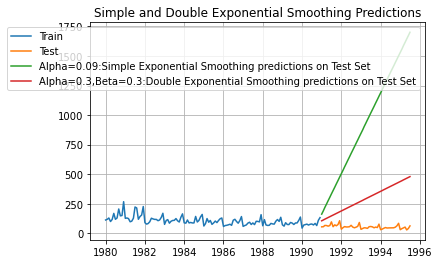

In [595]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(rose_log_train, label='Train')
plt.plot(rose_log_test, label='Test')

plt.plot(SES_predict, label='Alpha=0.09:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.3,Beta=0.3:Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple and Double Exponential Smoothing Predictions');

In [591]:
# Initializing the Holt Winters Smoothing Model
model_TES = ExponentialSmoothing(rose_log_train,trend='additive',seasonal='additive',initialization_method='estimated')
# Fitting the model
model_TES = model_TES.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES.params)

# Forecasting using this model for the duration of the test set
TES_predict =  model_TES.forecast(len(rose_log_test))



==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.08836782954933799, 'smoothing_trend': 3.7265369347685534e-06, 'smoothing_seasonal': 0.0002605065424824379, 'damping_trend': nan, 'initial_level': 146.57689198128827, 'initial_trend': -0.5479332045914932, 'initial_seasons': array([-31.19657397, -18.85433488, -10.86210616, -21.51886836,
       -12.7199789 ,  -7.23811729,   2.66927264,   8.79928342,
         4.85478098,   2.96421129,  21.04754145,  63.34400663]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [369]:
test_tes_rmse=mean_squared_error(rose_log_test.values,TES_predict.values,squared=False)
print('TES RMSE:',test_tes_rmse)



TES RMSE: 0.2605759363840529


,RMSE
Linear Regression,15.611866
Naive Model,79.718773
Simple Average,53.460570
Moving Average - rolling 2,11.529278
Movinbg Average - rolling 4,14.451403
Moving Average - rolling 6,14.566327
Moving Average - rolling 9,14.727630
Simple Exponential Smoothing,0.557920
Double Exponential Smoothing,0.346531
Triple Exponential Smoothing,0.260576


In [607]:
temp_resultsDf = pd.DataFrame({'RMSE': [test_tes_rmse]}
                           ,index=['Triple Exponential Smoothing,alpha-0.08 beta-3.72 gamma=0.00'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

,RMSE
Linear Regression,15.611866
Naive Model,79.718773
Simple Average,53.460570
Moving Average - rolling 2,11.529278
Movinbg Average - rolling 4,14.451403
...,...
"Simple Exponential Smoothing, alpha-0.3",47.504821
Double Exponential Smoothing,265.567594
"Simple Exponential Smoothing, alpha-0.09",36.796228
"Double Exponential Smoothing, autofit: alpha-0.12, beta-0.05",265.567594


In [599]:
model_TES = ExponentialSmoothing(rose_log_train,trend='additive',seasonal='additive',initialization_method='estimated')
temp_resultsDf=pd.DataFrame(columns=['RMSE'])
temp_resultsDf2=pd.DataFrame(columns=['RMSE'])
for i in np.arange(0.3,1,0.1): 
    for j in np.arange(0.3,1.1,0.1):
        for k in np.arange(0.3,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_predict = model_TES_alpha_i_j_k.forecast(steps=len(rose_log_test))
            test_tes_rmse=em.rmse(rose_log_test.values,TES_predict.values)[0]
            index_1='Alpha:'+str(round(i,2))+' Beta:'+str(round(j,2))+' Gamma:'+str(round(k,2))+' Triple Exponential Smoothing'
            temp_resultsDf2 = pd.DataFrame({'RMSE': [test_tes_rmse]}
                               ,index=[index_1])
            temp_resultsDf = pd.concat([temp_resultsDf,temp_resultsDf2])
    
temp_resultsDf.sort_values(by=['RMSE']).head()

,RMSE
Alpha:0.5 Beta:0.3 Gamma:0.4 Triple Exponential Smoothing,15.761378
Alpha:0.5 Beta:0.5 Gamma:0.5 Triple Exponential Smoothing,15.762185
Alpha:0.9 Beta:0.3 Gamma:0.5 Triple Exponential Smoothing,15.763352
Alpha:0.6 Beta:0.9 Gamma:0.3 Triple Exponential Smoothing,15.767329
Alpha:0.3 Beta:0.9 Gamma:0.4 Triple Exponential Smoothing,15.768134


In [602]:
model_TES = ExponentialSmoothing(rose_log_train,trend='additive',seasonal='additive',initialization_method='estimated')
model_TES_manual_fit = model_TES.fit(smoothing_level=0.5,smoothing_slope=0.3,smoothing_seasonal=0.4,optimized=False,use_brute=True)
TES_predict =  model_TES_manual_fit.forecast(len(rose_log_test))
test_tes_rmse=mean_squared_error(rose_log_test.values,TES_predict.values,squared=False)
print('TES RMSE:',test_tes_rmse)


TES RMSE: 17.88374157324735


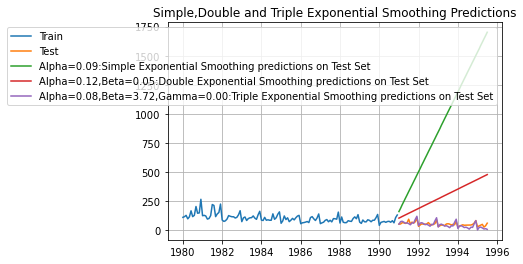

In [608]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(rose_log_train, label='Train')
plt.plot(rose_log_test, label='Test')

plt.plot(SES_predict, label='Alpha=0.09:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.12,Beta=0.05:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict, label='Alpha=0.08,Beta=3.72,Gamma=0.00:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions');

In [370]:
df1test = adfuller(df1)
df1test
print('DF test statistic is %3.3f' %df1test[0])
print('DF test p-value is %1.4f' %df1test[1])

DF test statistic is -1.877
DF test p-value is 0.3431


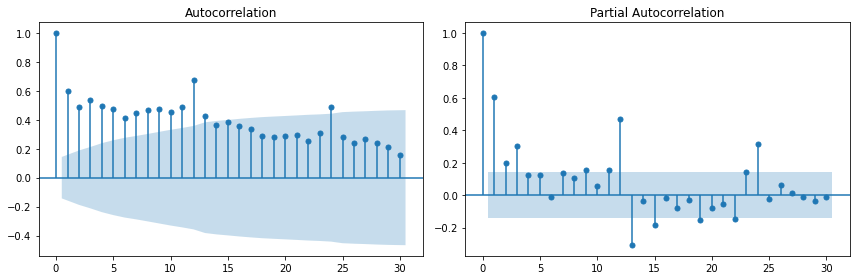

In [371]:
fig, axes = plt.subplots(1, 2)
fig.set_figwidth(12)
fig.set_figheight(4)
smt.graphics.plot_acf(df1, lags=30, ax=axes[0])
smt.graphics.plot_pacf(df1, lags=30, ax=axes[1])
plt.tight_layout()

In [372]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 3)

# Generate all different combinations of p, d and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [373]:
for param in pdq:
    ARIMA_model = ARIMA(rose_train['Rose'],order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic)) 

ARIMA(0, 0, 0) - AIC:1324.8997029577333
ARIMA(0, 0, 1) - AIC:1305.4684057684847
ARIMA(0, 0, 2) - AIC:1306.5866794769956
ARIMA(0, 1, 0) - AIC:1335.1526583086775
ARIMA(0, 1, 1) - AIC:1280.7261830464035
ARIMA(0, 1, 2) - AIC:1276.8353726229147
ARIMA(0, 2, 0) - AIC:1455.6859343736241
ARIMA(0, 2, 1) - AIC:1332.8448314322522
ARIMA(0, 2, 2) - AIC:1281.5025749193278
ARIMA(1, 0, 0) - AIC:1301.5463044356427
ARIMA(1, 0, 1) - AIC:1294.510585187145
ARIMA(1, 0, 2) - AIC:1292.053210251626
ARIMA(1, 1, 0) - AIC:1319.348310580781
ARIMA(1, 1, 1) - AIC:1277.775749172235
ARIMA(1, 1, 2) - AIC:1277.3592262067277
ARIMA(1, 2, 0) - AIC:1409.4080354466412


ValueError: The computed initial MA coefficients are not invertible
You should induce invertibility, choose a different model order, or you can
pass your own start_params.

In [470]:
# ARIMA(1,1,2) has the lowest AIC
mod = ARIMA(rose_train['Rose'], order=(1,1,2))

results_Arima = mod.fit()
print(results_Arima.summary())




                             ARIMA Model Results                              
Dep. Variable:                 D.Rose   No. Observations:                  131
Model:                 ARIMA(1, 1, 2)   Log Likelihood                -633.680
Method:                       css-mle   S.D. of innovations             29.978
Date:                Sat, 16 Jan 2021   AIC                           1277.359
Time:                        22:26:42   BIC                           1291.735
Sample:                    02-01-1980   HQIC                          1283.201
                         - 12-01-1990                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.4920      0.079     -6.224      0.000      -0.647      -0.337
ar.L1.D.Rose    -0.4163      0.222     -1.874      0.061      -0.852       0.019
ma.L1.D.Rose    -0.3615      0.189     -1.91

In [472]:
predicted_auto_ARIMA = results_Arima.forecast(steps=len(rose_test))

In [476]:
test_auto_arima = mean_squared_error(rose_test['Rose'],predicted_auto_ARIMA[0],squared=False)
print(rmse)

print('TES RMSE:',test_auto_arima)

temp_resultsDf = pd.DataFrame({'RMSE': [test_auto_arima]}
                           ,index=['Auto ARIMA'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

79.71877337417347
TES RMSE: 15.286072020175755


,RMSE
Linear Regression,1384.558065
Naive Model,3864.279352
Simple Average,1275.081804
Moving Average - rolling 2,813.400684
Movinbg Average - rolling 4,1156.589694
Moving Average - rolling 6,1283.927428
Moving Average - rolling 9,1346.278315
Simple Exponential Smoothing,0.557920
Double Exponential Smoothing,0.346531
Triple Exponential Smoothing,0.260576


In [376]:
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 6)
Model: (0, 1, 2)(0, 0, 2, 6)
Model: (1, 1, 0)(1, 0, 0, 6)
Model: (1, 1, 1)(1, 0, 1, 6)
Model: (1, 1, 2)(1, 0, 2, 6)
Model: (2, 1, 0)(2, 0, 0, 6)
Model: (2, 1, 1)(2, 0, 1, 6)
Model: (2, 1, 2)(2, 0, 2, 6)


In [377]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [379]:
for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(rose_train['Rose'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{}6 - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 6)6 - AIC:1323.9657875279158
SARIMA(0, 1, 0)x(0, 0, 1, 6)6 - AIC:1264.4996261113859
SARIMA(0, 1, 0)x(0, 0, 2, 6)6 - AIC:1144.7077471827295
SARIMA(0, 1, 0)x(1, 0, 0, 6)6 - AIC:1274.7897737087983
SARIMA(0, 1, 0)x(1, 0, 1, 6)6 - AIC:1241.7870945149068
SARIMA(0, 1, 0)x(1, 0, 2, 6)6 - AIC:1146.3093266722296
SARIMA(0, 1, 0)x(2, 0, 0, 6)6 - AIC:1137.9167236212038
SARIMA(0, 1, 0)x(2, 0, 1, 6)6 - AIC:1137.4533629515197
SARIMA(0, 1, 0)x(2, 0, 2, 6)6 - AIC:1117.0224426183172
SARIMA(0, 1, 1)x(0, 0, 0, 6)6 - AIC:1263.5369097383968
SARIMA(0, 1, 1)x(0, 0, 1, 6)6 - AIC:1201.3832548029543
SARIMA(0, 1, 1)x(0, 0, 2, 6)6 - AIC:1097.1908217752791
SARIMA(0, 1, 1)x(1, 0, 0, 6)6 - AIC:1222.4354735745048
SARIMA(0, 1, 1)x(1, 0, 1, 6)6 - AIC:1160.4386253747005
SARIMA(0, 1, 1)x(1, 0, 2, 6)6 - AIC:1084.8564124952734
SARIMA(0, 1, 1)x(2, 0, 0, 6)6 - AIC:1095.7490379982587
SARIMA(0, 1, 1)x(2, 0, 1, 6)6 - AIC:1097.645518399108
SARIMA(0, 1, 1)x(2, 0, 2, 6)6 - AIC:1053.0044082619288
SARIMA(0, 1

In [380]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
134,"(1, 1, 2)","(2, 0, 2, 6)",1041.655817
53,"(1, 1, 2)","(2, 0, 2, 6)",1041.655817
107,"(0, 1, 2)","(2, 0, 2, 6)",1043.600261
26,"(0, 1, 2)","(2, 0, 2, 6)",1043.600261
80,"(2, 1, 2)","(2, 0, 2, 6)",1045.220404


In [381]:
auto_SARIMA = sm.tsa.statespace.SARIMAX(rose_train['Rose'].values,
                                order=(1, 1, 2),
                                seasonal_order=(2, 0, 2, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA = auto_SARIMA.fit(maxiter=1000)
print(results_auto_SARIMA.summary())

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                  132
Model:             SARIMAX(1, 1, 2)x(2, 0, 2, 6)   Log Likelihood                -512.828
Date:                           Sat, 16 Jan 2021   AIC                           1041.656
Time:                                   12:28:37   BIC                           1063.685
Sample:                                        0   HQIC                          1050.598
                                           - 132                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5939      0.149     -3.978      0.000      -0.887      -0.301
ma.L1         -0.1954   1067.034     -0.000

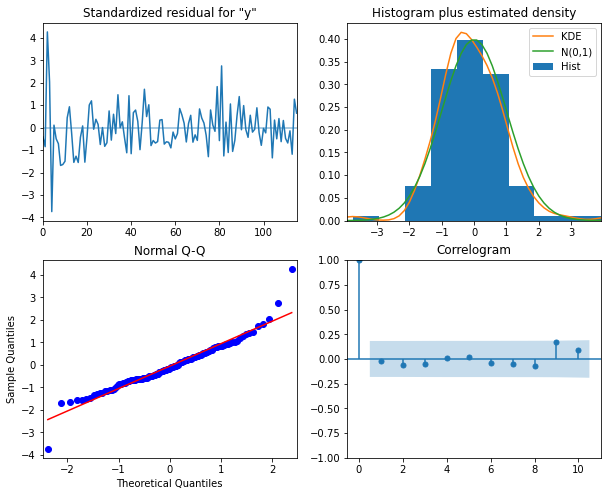

In [382]:
results_auto_SARIMA_6.plot_diagnostics()
plt.show()

In [383]:
predicted_auto_SARIMA_6 = results_auto_SARIMA.get_forecast(steps=len(rose_test))

In [384]:
predicted_auto_SARIMA_6.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,62.841638,18.848275,25.899698,99.783578
1,67.630850,19.300118,29.803314,105.458386
2,74.746923,19.412680,36.698770,112.795076
3,71.325811,19.475627,33.154284,109.497339
4,76.017740,19.483906,37.829985,114.205495


In [385]:
test_auto_sarima6 = mean_squared_error(rose_test['Rose'],predicted_auto_SARIMA_6.predicted_mean,squared=False)
print(rmse)

print('TES RMSE:',test_auto_sarima6)

temp_resultsDf = pd.DataFrame({'RMSE': [test_auto_sarima6]}
                           ,index=['Auto SARIMA 6'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

79.71877337417347
TES RMSE: 26.13520274162645


,RMSE
Linear Regression,15.611866
Naive Model,79.718773
Simple Average,53.460570
Moving Average - rolling 2,11.529278
Movinbg Average - rolling 4,14.451403
Moving Average - rolling 6,14.566327
Moving Average - rolling 9,14.727630
Simple Exponential Smoothing,0.557920
Double Exponential Smoothing,0.346531
Triple Exponential Smoothing,0.260576


In [388]:
p =q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)


In [389]:
for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(rose_train['Rose'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:1323.9657875279158
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1145.4230827207255
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:976.4375296380892
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1139.921738995602
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1116.020786938662
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:969.6913635752176
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:960.8812220353041
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:962.8794540697559
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:955.5735408945745
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:1263.5369097383968
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1098.5554825918332
SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:923.6314049383909
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1095.793632491829
SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1054.7434330947153
SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:918.857348330446
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:914.5982866535896
SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:915.3332430461664
SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:901.1988260392989
SARIMA(0, 1, 2)x(0, 0, 0

In [390]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
188,"(0, 1, 2)","(2, 0, 2, 12)",887.937509
269,"(0, 1, 2)","(2, 0, 2, 12)",887.937509
215,"(1, 1, 2)","(2, 0, 2, 12)",889.871767
296,"(1, 1, 2)","(2, 0, 2, 12)",889.871767
323,"(2, 1, 2)","(2, 0, 2, 12)",890.668798


In [391]:
auto_SARIMA_12 = sm.tsa.statespace.SARIMAX(rose_train['Rose'].values,
                                order=(0, 1, 2),
                                seasonal_order=(2, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_12 = auto_SARIMA_12.fit(maxiter=1000)
print(results_auto_SARIMA_12.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(0, 1, 2)x(2, 0, 2, 12)   Log Likelihood                -436.969
Date:                            Sat, 16 Jan 2021   AIC                            887.938
Time:                                    12:32:18   BIC                            906.448
Sample:                                         0   HQIC                           895.437
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8427    189.601     -0.004      0.996    -372.455     370.769
ma.L2         -0.1573     29.787   

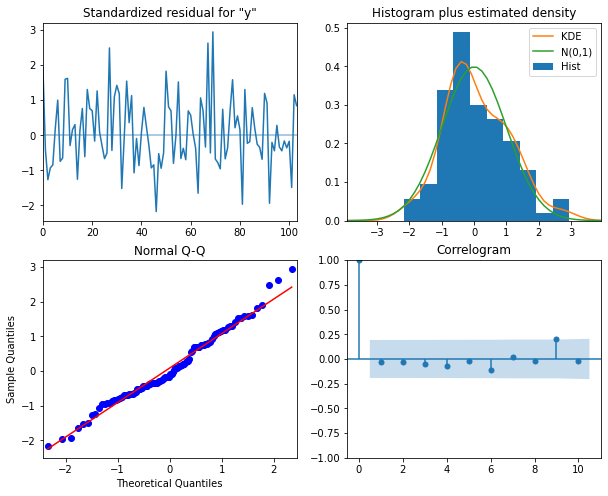

In [392]:
results_auto_SARIMA_12.plot_diagnostics()
plt.show()

In [393]:
predicted_auto_SARIMA_12 = results_auto_SARIMA_12.get_forecast(steps=len(rose_test))

In [394]:
predicted_auto_SARIMA_12.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,62.867262,15.928500,31.647975,94.086549
1,70.541190,16.147658,38.892361,102.190018
2,77.356410,16.147656,45.707586,109.005234
3,76.208814,16.147656,44.559990,107.857637
4,72.747397,16.147656,41.098574,104.396221


In [395]:
test_auto_sarima12 = mean_squared_error(rose_test['Rose'],predicted_auto_SARIMA_12.predicted_mean,squared=False)
print(rmse)

print('TES RMSE:',test_auto_sarima12)

temp_resultsDf = pd.DataFrame({'RMSE': [test_auto_sarima12]}
                           ,index=['Auto SARIMA 12'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

79.71877337417347
TES RMSE: 26.928361253034815


,RMSE
Linear Regression,15.611866
Naive Model,79.718773
Simple Average,53.460570
Moving Average - rolling 2,11.529278
Movinbg Average - rolling 4,14.451403
Moving Average - rolling 6,14.566327
Moving Average - rolling 9,14.727630
Simple Exponential Smoothing,0.557920
Double Exponential Smoothing,0.346531
Triple Exponential Smoothing,0.260576


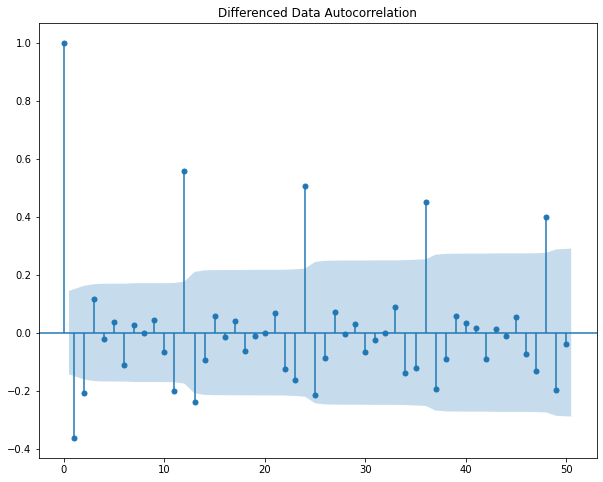

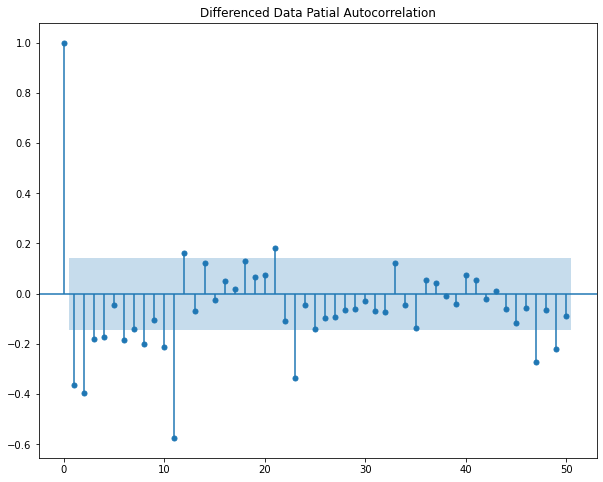

In [396]:
plot_acf(df1['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(df1['Rose'].diff().dropna(),lags=50,title='Differenced Data Patial Autocorrelation')
plt.show()

In [399]:
resultsDf.sort_values(by=['RMSE'])

,RMSE
Triple Exponential Smoothing,0.260576
Double Exponential Smoothing,0.346531
Simple Exponential Smoothing,0.557920
Moving Average - rolling 2,11.529278
Movinbg Average - rolling 4,14.451403
Moving Average - rolling 6,14.566327
Moving Average - rolling 9,14.727630
Linear Regression,15.611866
Auto SARIMA 6,26.135203
Auto SARIMA 12,26.928361


In [402]:
sparkling_train=df2[df2.index.year < 1991]
sparkling_test=df2[df2.index.year >= 1991]

len(sparkling_train)

132

In [403]:
sparkling_train_time = [i+1 for i in range(len(sparkling_train))]
sparkling_test_time = [i+131 for i in range(len(sparkling_test))]

print('sparkling Training Time instance','\n',sparkling_train_time)
print('sparkling Test Time instance','\n',sparkling_test_time)

sparkling Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
sparkling Test Time instance 
 [131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185]


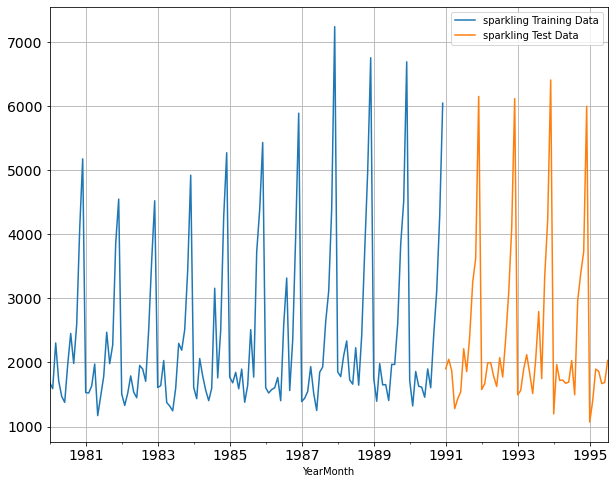

In [406]:
sparkling_train['Sparkling'].plot(fontsize=14)
sparkling_test['Sparkling'].plot(fontsize=14)
plt.grid()
plt.legend(['sparkling Training Data','sparkling Test Data'])
plt.show()

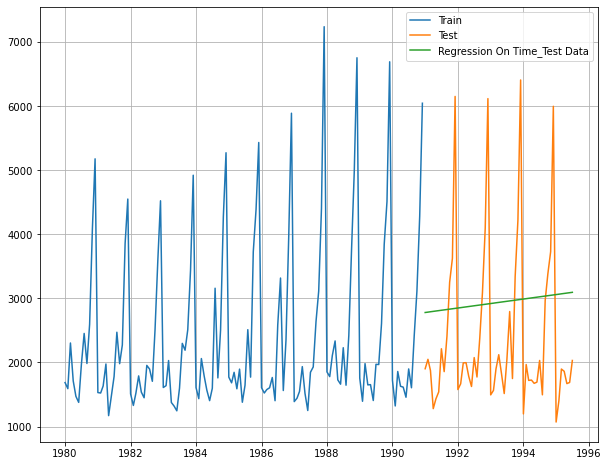

In [408]:
LinearRegression_train = sparkling_train.copy()
LinearRegression_test = sparkling_test.copy()
LinearRegression_train['time'] = sparkling_train_time
LinearRegression_test['time'] = sparkling_test_time

lr = LinearRegression()
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Sparkling'])

train_predictions_model1         = lr.predict(LinearRegression_train[['time']])
LinearRegression_train['RegOnTime'] = train_predictions_model1

test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.plot( sparkling_train['Sparkling'], label='Train')
plt.plot(sparkling_test['Sparkling'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')

plt.legend(loc='best')
plt.grid();

In [409]:
test_lr_rmse = metrics.mean_squared_error(sparkling_test['Sparkling'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 15.612


In [410]:
resultsDf=pd.DataFrame()
temp_resultsDf = pd.DataFrame({'RMSE': [test_lr_rmse]}
                           ,index=['Linear Regression'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

,RMSE
Linear Regression,1384.558065


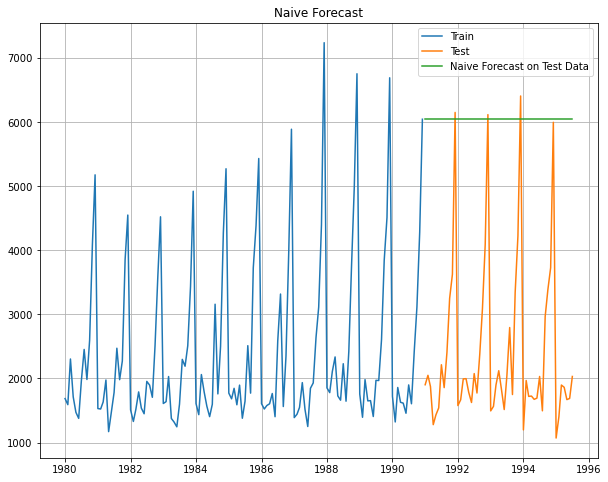

In [413]:
NaiveModel_train = sparkling_train.copy()
NaiveModel_test = sparkling_test.copy()

NaiveModel_test['naive'] = np.asarray(sparkling_train['Sparkling'])[len(np.asarray(sparkling_train['Sparkling']))-1]
NaiveModel_test['naive'].head()

plt.plot(NaiveModel_train['Sparkling'], label='Train')
plt.plot(sparkling_test['Sparkling'], label='Test')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

In [414]:
test_naive_rmse = metrics.mean_squared_error(sparkling_test['Sparkling'],NaiveModel_test['naive'],squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test))
temp_resultsDf = pd.DataFrame({'RMSE': [test_naive_rmse]}
                           ,index=['Naive Model'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

For RegressionOnTime forecast on the Test Data,  RMSE is 79.719


,RMSE
Linear Regression,1384.558065
Naive Model,3864.279352


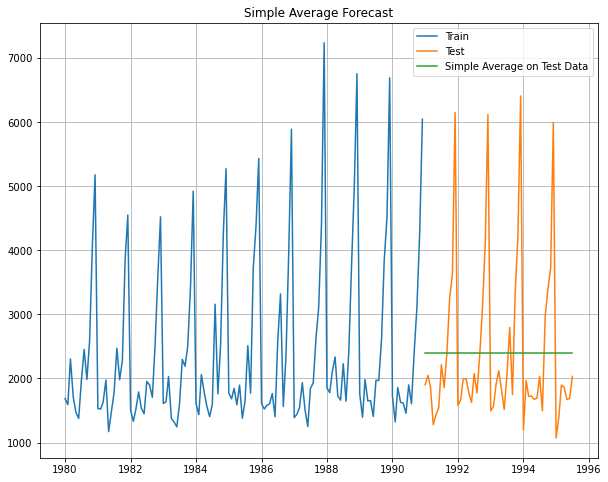

In [415]:
SimpleAverage_train = sparkling_train.copy()
SimpleAverage_test = sparkling_test.copy()

SimpleAverage_test['mean_forecast'] = sparkling_train['Sparkling'].mean()
SimpleAverage_test.head()

plt.plot(SimpleAverage_train['Sparkling'], label='Train')
plt.plot(SimpleAverage_test['Sparkling'], label='Test')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

In [416]:
rmse_model3_test = metrics.mean_squared_error(sparkling_test['Sparkling'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))
temp_resultsDf = pd.DataFrame({'RMSE': [rmse_model3_test]}
                           ,index=['Simple Average'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

For Simple Average forecast on the Test Data,  RMSE is 1275.082


,RMSE
Linear Regression,1384.558065
Naive Model,3864.279352
Simple Average,1275.081804


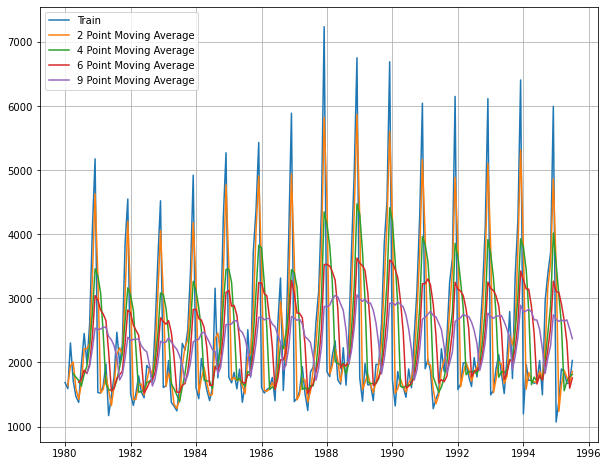

In [417]:
MovingAverage = df2.copy()
MovingAverage.head()

MovingAverage['Trailing_2'] = MovingAverage['Sparkling'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Sparkling'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Sparkling'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Sparkling'].rolling(9).mean()

MovingAverage.head()

## Plotting on the whole data

plt.plot(MovingAverage['Sparkling'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

#Creating train and test set 
trailing_MovingAverage_train=MovingAverage[MovingAverage.index.year < 1991] 
trailing_MovingAverage_test=MovingAverage[MovingAverage.index.year >= 1991]

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 813.401
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 1156.590
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 1283.927
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 1346.278


,RMSE
Linear Regression,1384.558065
Naive Model,3864.279352
Simple Average,1275.081804
Moving Average - rolling 2,813.400684
Movinbg Average - rolling 4,1156.589694
Moving Average - rolling 6,1283.927428
Moving Average - rolling 9,1346.278315


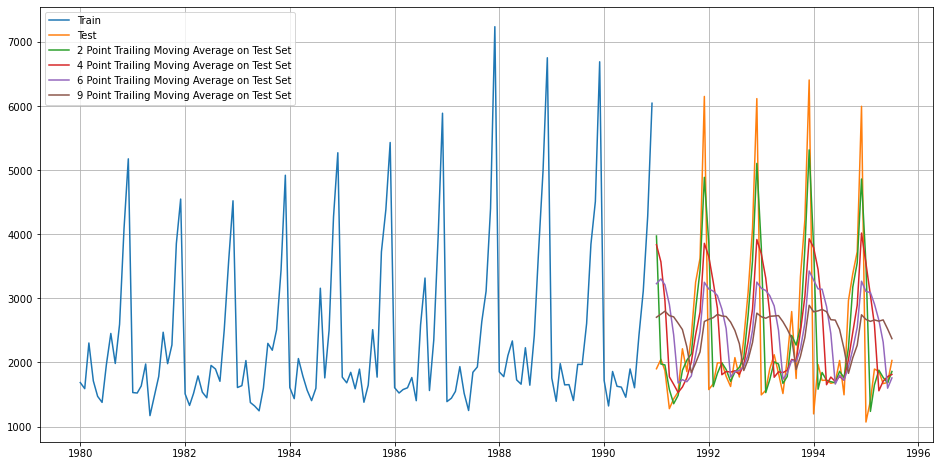

In [418]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Sparkling'], label='Train')
plt.plot(trailing_MovingAverage_test['Sparkling'], label='Test')


plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')

plt.legend(loc = 'best')
plt.grid();

## Test Data - RMSE  --> 2 point Trailing MA

rmse_model4_test_2 = metrics.mean_squared_error(sparkling_test['Sparkling'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_2))

## Test Data - RMSE --> 4 point Trailing MA

rmse_model4_test_4 = metrics.mean_squared_error(sparkling_test['Sparkling'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_model4_test_6 = metrics.mean_squared_error(sparkling_test['Sparkling'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_6))

## Test Data - RMSE --> 9 point Trailing MA

rmse_model4_test_9 = metrics.mean_squared_error(sparkling_test['Sparkling'],trailing_MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_9))

temp_resultsDf = pd.DataFrame({'RMSE': [rmse_model4_test_2]}
                           ,index=['Moving Average - rolling 2'])

resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

temp_resultsDf = pd.DataFrame({'RMSE': [rmse_model4_test_4]}
                           ,index=['Movinbg Average - rolling 4'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

temp_resultsDf = pd.DataFrame({'RMSE': [rmse_model4_test_6]}
                           ,index=['Moving Average - rolling 6'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

temp_resultsDf = pd.DataFrame({'RMSE': [rmse_model4_test_9]}
                           ,index=['Moving Average - rolling 9'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

In [419]:
trailing_MovingAverage_train.head(15)

,Sparkling,Trailing_2,Trailing_4,Trailing_6,Trailing_9
YearMonth,,,,,
1980-01-01,1686,NaN,NaN,NaN,NaN
1980-02-01,1591,1638.5,NaN,NaN,NaN
1980-03-01,2304,1947.5,NaN,NaN,NaN
1980-04-01,1712,2008.0,1823.25,NaN,NaN
1980-05-01,1471,1591.5,1769.50,NaN,NaN
1980-06-01,1377,1424.0,1716.00,1690.166667,NaN
1980-07-01,1966,1671.5,1631.50,1736.833333,NaN
1980-08-01,2453,2209.5,1816.75,1880.500000,NaN
1980-09-01,1984,2218.5,1945.00,1827.166667,1838.222222


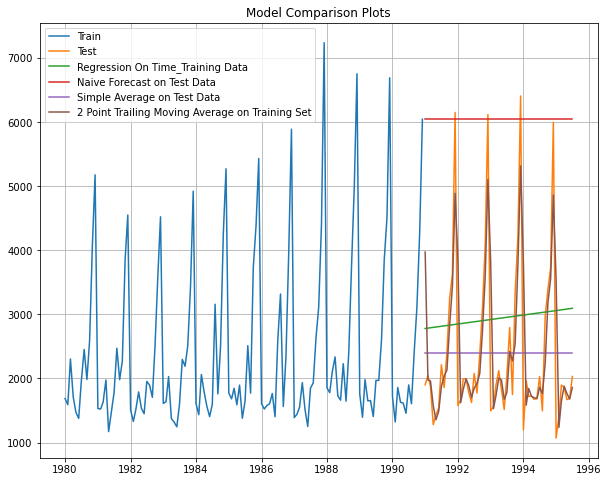

In [420]:

plt.plot(sparkling_train['Sparkling'], label='Train')
plt.plot(sparkling_test['Sparkling'], label='Test')

plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Training Data')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')


plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

In [610]:
df1_SES=df2.copy()
# dfs_SES['Sparkling']=np.log(df2['Sparkling']) 
sparkling_log_train=df1_SES[df1_SES.index.year < 1991]
sparkling_log_test=df1_SES[df1_SES.index.year >= 1991]
df1_SES.head()

,Sparkling
YearMonth,
1980-01-01,1686
1980-02-01,1591
1980-03-01,2304
1980-04-01,1712
1980-05-01,1471


In [615]:
model_SES = SimpleExpSmoothing(sparkling_log_train,initialization_method='estimated')
model_SES_autofit = model_SES.fit(optimized=True)
model_SES_autofit.params




{'smoothing_level': 0.07029459943040381,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1764.1004162520212,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [616]:
SES_predict = model_SES_autofit.forecast(steps=len(sparkling_log_test))

test_ses_rmse=mean_squared_error(sparkling_log_test.values,SES_predict.values,squared=False)
print('SES RMSE:',test_ses_rmse)
#different way to calculate RMSE
test_ses_rmse=em.rmse(sparkling_log_test.values,SES_predict.values)[0]
print('SES RMSE (calculated using statsmodels):',test_ses_rmse)

SES RMSE: 1338.0121443910186
SES RMSE (calculated using statsmodels): 1338.0121443910189


In [617]:
temp_resultsDf = pd.DataFrame({'RMSE': [test_ses_rmse]}
                           ,index=['Simple Exponential Smoothing, alpha-0.07'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

,RMSE
Linear Regression,15.611866
Naive Model,79.718773
Simple Average,53.460570
Moving Average - rolling 2,11.529278
Movinbg Average - rolling 4,14.451403
...,...
Double Exponential Smoothing,265.567594
"Simple Exponential Smoothing, alpha-0.09",36.796228
"Double Exponential Smoothing, autofit: alpha-0.12, beta-0.05",265.567594
"Triple Exponential Smoothing,alpha-0.08 beta-3.72 gamma=0.00",17.883742


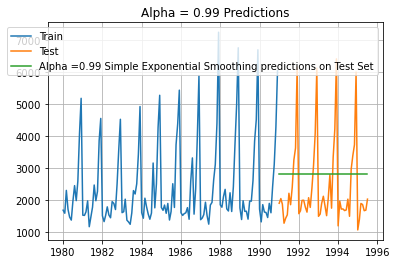

In [618]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(sparkling_log_train, label='Train')
plt.plot(sparkling_log_test, label='Test')

plt.plot(SES_predict, label='Alpha =0.99 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha = 0.99 Predictions');

In [428]:
test_ses_rmse=mean_squared_error(sparkling_log_test.values,SES_predict.values,squared=False)
print('SES RMSE:',test_ses_rmse)
#different way to calculate RMSE
test_ses_rmse=em.rmse(sparkling_log_test.values,SES_predict.values)[0]
print('SES RMSE (calculated using statsmodels):',test_ses_rmse)

temp_resultsDf = pd.DataFrame({'RMSE': [test_ses_rmse]}
                           ,index=['Simple Exponential Smoothing'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

SES RMSE: 0.5579198856947764
SES RMSE (calculated using statsmodels): 0.5579198856947764


,RMSE
Linear Regression,1384.558065
Naive Model,3864.279352
Simple Average,1275.081804
Moving Average - rolling 2,813.400684
Movinbg Average - rolling 4,1156.589694
Moving Average - rolling 6,1283.927428
Moving Average - rolling 9,1346.278315
Simple Exponential Smoothing,0.557920


In [429]:
# Initializing the Double Exponential Smoothing Model
model_DES = Holt(sparkling_log_train,initialization_method='estimated')
# Fitting the model
model_DES = model_DES.fit()

print('')
print('==Holt model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_DES.params)


# Forecasting using this model for the duration of the test set
DES_predict =  model_DES.forecast(len(sparkling_log_test))
DES_predict


==Holt model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 1.4901161193847656e-08, 'smoothing_trend': 4.4845510503902035e-09, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 4.902287951425559, 'initial_trend': -0.004507371336551742, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


1991-01-01    4.302808
1991-02-01    4.298300
1991-03-01    4.293793
1991-04-01    4.289285
1991-05-01    4.284778
1991-06-01    4.280271
1991-07-01    4.275763
1991-08-01    4.271256
1991-09-01    4.266749
1991-10-01    4.262241
1991-11-01    4.257734
1991-12-01    4.253226
1992-01-01    4.248719
1992-02-01    4.244212
1992-03-01    4.239704
1992-04-01    4.235197
1992-05-01    4.230690
1992-06-01    4.226182
1992-07-01    4.221675
1992-08-01    4.217168
1992-09-01    4.212660
1992-10-01    4.208153
1992-11-01    4.203645
1992-12-01    4.199138
1993-01-01    4.194631
1993-02-01    4.190123
1993-03-01    4.185616
1993-04-01    4.181109
1993-05-01    4.176601
1993-06-01    4.172094
1993-07-01    4.167586
1993-08-01    4.163079
1993-09-01    4.158572
1993-10-01    4.154064
1993-11-01    4.149557
1993-12-01    4.145050
1994-01-01    4.140542
1994-02-01    4.136035
1994-03-01    4.131527
1994-04-01    4.127020
1994-05-01    4.122513
1994-06-01    4.118005
1994-07-01    4.113498
1994-08-01 

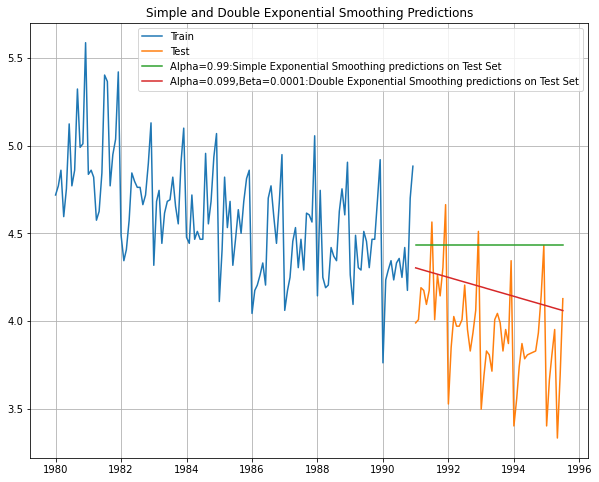

In [430]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(sparkling_log_train, label='Train')
plt.plot(sparkling_log_test, label='Test')

plt.plot(SES_predict, label='Alpha=0.99:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.099,Beta=0.0001:Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple and Double Exponential Smoothing Predictions');

In [431]:
test_des_rmse=mean_squared_error(sparkling_log_test.values,DES_predict.values,squared=False)
print('DES RMSE:',test_des_rmse)

temp_resultsDf = pd.DataFrame({'RMSE': [test_des_rmse]}
                           ,index=['Double Exponential Smoothing'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

DES RMSE: 0.3465305068868501


,RMSE
Linear Regression,1384.558065
Naive Model,3864.279352
Simple Average,1275.081804
Moving Average - rolling 2,813.400684
Movinbg Average - rolling 4,1156.589694
Moving Average - rolling 6,1283.927428
Moving Average - rolling 9,1346.278315
Simple Exponential Smoothing,0.557920
Double Exponential Smoothing,0.346531


In [432]:
# Initializing the Holt Winters Smoothing Model
model_TES = ExponentialSmoothing(sparkling_log_train,trend='additive',seasonal='additive',initialization_method='estimated')
# Fitting the model
model_TES = model_TES.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES.params)

# Forecasting using this model for the duration of the test set
TES_predict =  model_TES.forecast(len(sparkling_log_test))
TES_predict


==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.06651313061545876, 'smoothing_trend': 4.792976951325612e-15, 'smoothing_seasonal': 5.98548762212151e-16, 'damping_trend': nan, 'initial_level': 4.9737836582695625, 'initial_trend': -0.005030137747678174, 'initial_seasons': array([-0.33515041, -0.17481636, -0.08584488, -0.18182097, -0.0964983 ,
       -0.05736233,  0.03012186,  0.07612066,  0.06555831,  0.05538602,
        0.22532475,  0.50742931]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


1991-01-01    3.969631
1991-02-01    4.124935
1991-03-01    4.208877
1991-04-01    4.107870
1991-05-01    4.188163
1991-06-01    4.222269
1991-07-01    4.304723
1991-08-01    4.345692
1991-09-01    4.330099
1991-10-01    4.314897
1991-11-01    4.479805
1991-12-01    4.756880
1992-01-01    3.909270
1992-02-01    4.064574
1992-03-01    4.148515
1992-04-01    4.047509
1992-05-01    4.127801
1992-06-01    4.161907
1992-07-01    4.244361
1992-08-01    4.285330
1992-09-01    4.269737
1992-10-01    4.254535
1992-11-01    4.419444
1992-12-01    4.696518
1993-01-01    3.848908
1993-02-01    4.004212
1993-03-01    4.088153
1993-04-01    3.987147
1993-05-01    4.067440
1993-06-01    4.101546
1993-07-01    4.184000
1993-08-01    4.224968
1993-09-01    4.209376
1993-10-01    4.194173
1993-11-01    4.359082
1993-12-01    4.636156
1994-01-01    3.788546
1994-02-01    3.943850
1994-03-01    4.027792
1994-04-01    3.926785
1994-05-01    4.007078
1994-06-01    4.041184
1994-07-01    4.123638
1994-08-01 

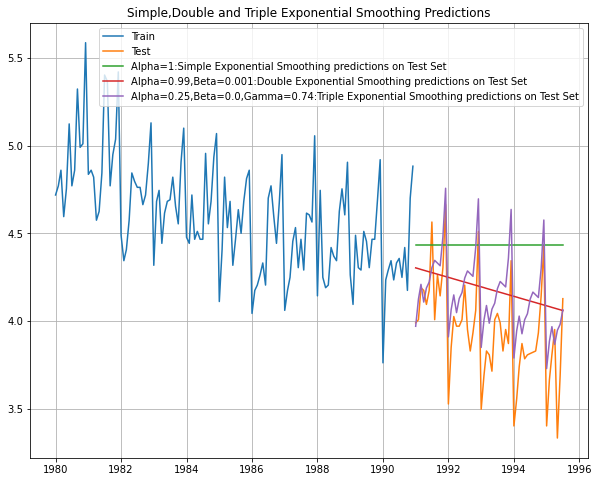

In [433]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(sparkling_log_train, label='Train')
plt.plot(sparkling_log_test, label='Test')

plt.plot(SES_predict, label='Alpha=1:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.99,Beta=0.001:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict, label='Alpha=0.25,Beta=0.0,Gamma=0.74:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions');

In [434]:
test_tes_rmse=mean_squared_error(sparkling_log_test.values,TES_predict.values,squared=False)
print('TES RMSE:',test_tes_rmse)

temp_resultsDf = pd.DataFrame({'RMSE': [test_tes_rmse]}
                           ,index=['Triple Exponential Smoothing'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

TES RMSE: 0.2605759363840529


,RMSE
Linear Regression,1384.558065
Naive Model,3864.279352
Simple Average,1275.081804
Moving Average - rolling 2,813.400684
Movinbg Average - rolling 4,1156.589694
Moving Average - rolling 6,1283.927428
Moving Average - rolling 9,1346.278315
Simple Exponential Smoothing,0.557920
Double Exponential Smoothing,0.346531
Triple Exponential Smoothing,0.260576


In [435]:
df2test = adfuller(df2)
df2test
print('DF test statistic is %3.3f' %df2test[0])
print('DF test p-value is %1.4f' %df2test[1])

DF test statistic is -1.360
DF test p-value is 0.6011


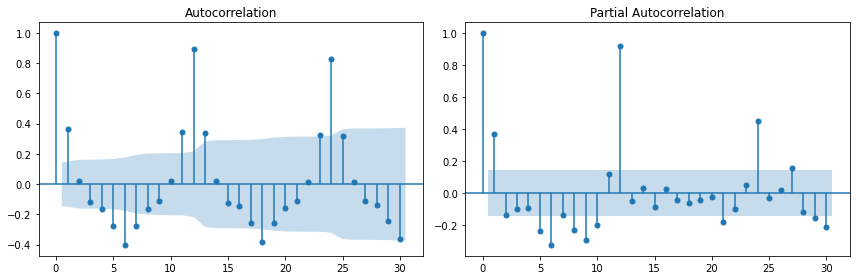

In [436]:
fig, axes = plt.subplots(1, 2)
fig.set_figwidth(12)
fig.set_figheight(4)
smt.graphics.plot_acf(df2, lags=30, ax=axes[0])
smt.graphics.plot_pacf(df2, lags=30, ax=axes[1])
plt.tight_layout()

In [438]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 3)

# Generate all different combinations of p, d and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [440]:
for param in pdq:
    ARIMA_model = ARIMA(sparkling_train['Sparkling'],order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic)) 

ARIMA(0, 0, 0) - AIC:2271.203212328525
ARIMA(0, 0, 1) - AIC:2245.268852081529
ARIMA(0, 0, 2) - AIC:2245.3432149021323
ARIMA(0, 1, 0) - AIC:2269.582796371201
ARIMA(0, 1, 1) - AIC:2264.9064368172944
ARIMA(0, 1, 2) - AIC:2232.783097684661
ARIMA(0, 2, 0) - AIC:2361.0395076589293
ARIMA(0, 2, 1) - AIC:2260.055586232739
ARIMA(0, 2, 2) - AIC:2256.192737218136
ARIMA(1, 0, 0) - AIC:2247.3482714177458
ARIMA(1, 0, 1) - AIC:2245.9490903919827
ARIMA(1, 0, 2) - AIC:2246.0121931896183
ARIMA(1, 1, 0) - AIC:2268.5280606648653
ARIMA(1, 1, 1) - AIC:2235.013945358969
ARIMA(1, 1, 2) - AIC:2233.5976471190693
ARIMA(1, 2, 0) - AIC:2330.610911682949
ARIMA(1, 2, 1) - AIC:2259.285099873412


ValueError: The computed initial MA coefficients are not invertible
You should induce invertibility, choose a different model order, or you can
pass your own start_params.

In [477]:
# ARIMA(1,1,2) has the lowest AIC
mod = ARIMA(sparkling_train['Sparkling'], order=(0,1,2))

results_Arima = mod.fit()
print(results_Arima.summary())

                             ARIMA Model Results                              
Dep. Variable:            D.Sparkling   No. Observations:                  131
Model:                 ARIMA(0, 1, 2)   Log Likelihood               -1112.392
Method:                       css-mle   S.D. of innovations           1159.696
Date:                Sat, 16 Jan 2021   AIC                           2232.783
Time:                        22:34:24   BIC                           2244.284
Sample:                    02-01-1980   HQIC                          2237.456
                         - 12-01-1990                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 6.2472      3.800      1.644      0.100      -1.201      13.696
ma.L1.D.Sparkling    -0.5555      0.073     -7.583      0.000      -0.699      -0.412
ma.L2.D.Sparkling    -0.

In [478]:
predicted_auto_ARIMA = results_Arima.forecast(steps=len(sparkling_test))
test_auto_arima = mean_squared_error(sparkling_test['Sparkling'],predicted_auto_ARIMA[0],squared=False)
print(rmse)

print('TES RMSE:',test_auto_arima)

temp_resultsDf = pd.DataFrame({'RMSE': [test_auto_arima]}
                           ,index=['Auto ARIMA'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

79.71877337417347
TES RMSE: 2935.5117270643514


,RMSE
Linear Regression,1384.558065
Naive Model,3864.279352
Simple Average,1275.081804
Moving Average - rolling 2,813.400684
Movinbg Average - rolling 4,1156.589694
Moving Average - rolling 6,1283.927428
Moving Average - rolling 9,1346.278315
Simple Exponential Smoothing,0.557920
Double Exponential Smoothing,0.346531
Triple Exponential Smoothing,0.260576


In [442]:
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 6)
Model: (0, 1, 2)(0, 0, 2, 6)
Model: (1, 1, 0)(1, 0, 0, 6)
Model: (1, 1, 1)(1, 0, 1, 6)
Model: (1, 1, 2)(1, 0, 2, 6)
Model: (2, 1, 0)(2, 0, 0, 6)
Model: (2, 1, 1)(2, 0, 1, 6)
Model: (2, 1, 2)(2, 0, 2, 6)


In [443]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [444]:
for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(sparkling_train['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{}6 - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 6)6 - AIC:2251.3597196862966
SARIMA(0, 1, 0)x(0, 0, 1, 6)6 - AIC:2152.3780761716284
SARIMA(0, 1, 0)x(0, 0, 2, 6)6 - AIC:1955.6355536890933
SARIMA(0, 1, 0)x(1, 0, 0, 6)6 - AIC:2164.4097581959904
SARIMA(0, 1, 0)x(1, 0, 1, 6)6 - AIC:2079.559984442563
SARIMA(0, 1, 0)x(1, 0, 2, 6)6 - AIC:1926.9360111185642
SARIMA(0, 1, 0)x(2, 0, 0, 6)6 - AIC:1839.4012986872267
SARIMA(0, 1, 0)x(2, 0, 1, 6)6 - AIC:1841.199361751051
SARIMA(0, 1, 0)x(2, 0, 2, 6)6 - AIC:1810.9177805657487
SARIMA(0, 1, 1)x(0, 0, 0, 6)6 - AIC:2230.1629078505825
SARIMA(0, 1, 1)x(0, 0, 1, 6)6 - AIC:2130.5652859082847
SARIMA(0, 1, 1)x(0, 0, 2, 6)6 - AIC:1918.1876339543767
SARIMA(0, 1, 1)x(1, 0, 0, 6)6 - AIC:2139.573242878454
SARIMA(0, 1, 1)x(1, 0, 1, 6)6 - AIC:2006.5174298135796
SARIMA(0, 1, 1)x(1, 0, 2, 6)6 - AIC:1855.7093274084523
SARIMA(0, 1, 1)x(2, 0, 0, 6)6 - AIC:1798.7885104034895
SARIMA(0, 1, 1)x(2, 0, 1, 6)6 - AIC:1800.77179337265
SARIMA(0, 1, 1)x(2, 0, 2, 6)6 - AIC:1741.7036712072565
SARIMA(0, 1, 2)

In [445]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
26,"(0, 1, 2)","(2, 0, 2, 6)",1727.888804
53,"(1, 1, 2)","(2, 0, 2, 6)",1730.103879
17,"(0, 1, 1)","(2, 0, 2, 6)",1741.703671
44,"(1, 1, 1)","(2, 0, 2, 6)",1743.379783
71,"(2, 1, 1)","(2, 0, 2, 6)",1743.874207


In [456]:
auto_SARIMA = sm.tsa.statespace.SARIMAX(sparkling_train['Sparkling'].values,
                                order=(0, 1, 2),
                                seasonal_order=(2, 0, 2, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA = auto_SARIMA.fit(maxiter=1000)
print(results_auto_SARIMA.summary())

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                  132
Model:             SARIMAX(0, 1, 2)x(2, 0, 2, 6)   Log Likelihood                -856.944
Date:                           Sat, 16 Jan 2021   AIC                           1727.889
Time:                                   22:16:37   BIC                           1747.164
Sample:                                        0   HQIC                          1735.713
                                           - 132                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7851      0.103     -7.655      0.000      -0.986      -0.584
ma.L2         -0.0975      0.112     -0.870

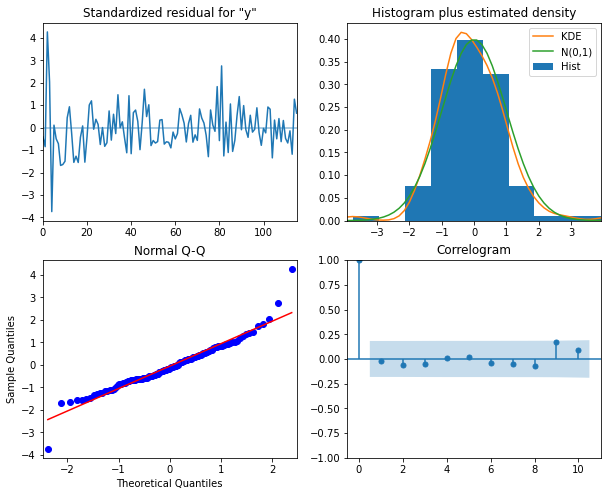

In [457]:
results_auto_SARIMA_6.plot_diagnostics()
plt.show()

In [458]:
predicted_auto_SARIMA_6 = results_auto_SARIMA.get_forecast(steps=len(sparkling_test))

In [459]:
predicted_auto_SARIMA_6.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,1375.642794,384.078614,622.862544,2128.423045
1,1116.743965,392.846150,346.779659,1886.708271
2,1667.593098,395.419724,892.584681,2442.601515
3,1528.349292,397.979749,748.323318,2308.375266
4,1372.265429,400.523465,587.253862,2157.276996


In [460]:
test_auto_sarima6 = mean_squared_error(sparkling_test['Sparkling'],predicted_auto_SARIMA_6.predicted_mean,squared=False)
print(rmse)

print('TES RMSE:',test_auto_sarima6)

temp_resultsDf = pd.DataFrame({'RMSE': [test_auto_sarima6]}
                           ,index=['Auto SARIMA 6'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

79.71877337417347
TES RMSE: 601.2547122351654


,RMSE
Linear Regression,1384.558065
Naive Model,3864.279352
Simple Average,1275.081804
Moving Average - rolling 2,813.400684
Movinbg Average - rolling 4,1156.589694
Moving Average - rolling 6,1283.927428
Moving Average - rolling 9,1346.278315
Simple Exponential Smoothing,0.557920
Double Exponential Smoothing,0.346531
Triple Exponential Smoothing,0.260576


In [452]:
p =q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)


In [453]:
for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(sparkling_train['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:2251.3597196862966
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1956.2614616844628
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:1723.153364023882
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1837.4366022456675
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1806.9905301388608
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:1633.2108735791512
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:1648.3776153470856
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:1647.2054158611027
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:1630.989805392081
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:2230.1629078505825
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1923.7688649566358
SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:1692.7089572710438
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1797.179588183803
SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1738.0903193745614
SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:1570.1509146277979
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:1605.6751954175065
SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:1599.2245118895248
SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:1570.4018824151685
SARIMA(0, 1, 

In [454]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
131,"(1, 1, 2)","(1, 0, 2, 12)",1555.584247
134,"(1, 1, 2)","(2, 0, 2, 12)",1555.934586
107,"(0, 1, 2)","(2, 0, 2, 12)",1557.121565
104,"(0, 1, 2)","(1, 0, 2, 12)",1557.160507
158,"(2, 1, 2)","(1, 0, 2, 12)",1557.340402


In [461]:
auto_SARIMA_12 = sm.tsa.statespace.SARIMAX(sparkling_train['Sparkling'].values,
                                order=(1, 1, 2),
                                seasonal_order=(1, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_12 = auto_SARIMA_12.fit(maxiter=1000)
print(results_auto_SARIMA_12.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(1, 1, 2)x(1, 0, 2, 12)   Log Likelihood                -446.366
Date:                            Sat, 16 Jan 2021   AIC                            906.732
Time:                                    22:17:31   BIC                            925.243
Sample:                                         0   HQIC                           914.231
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1142      0.369     -0.310      0.757      -0.837       0.608
ma.L1         -0.6699    309.896   

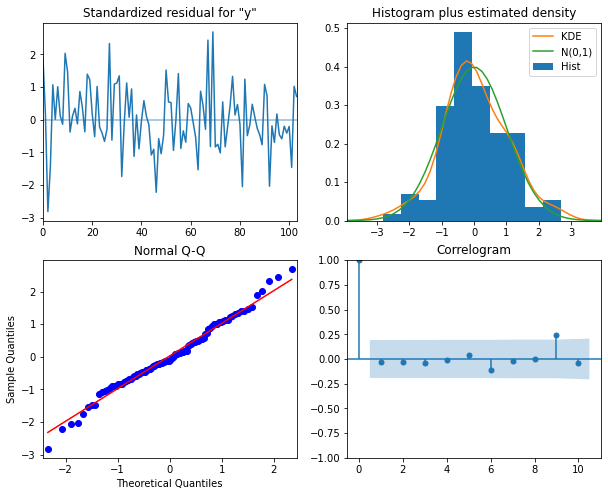

In [462]:
results_auto_SARIMA_12.plot_diagnostics()
plt.show()

In [463]:
predicted_auto_SARIMA_12 = results_auto_SARIMA_12.get_forecast(steps=len(sparkling_test))

In [464]:
predicted_auto_SARIMA_12.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,65.840595,17.400144,31.736938,99.944251
1,72.163121,17.834858,37.207441,107.118801
2,80.743651,17.835361,45.786985,115.700316
3,79.341251,17.835949,44.383434,114.299069
4,75.274389,17.835890,40.316686,110.232092


In [465]:
test_auto_sarima12 = mean_squared_error(sparkling_test['Sparkling'],predicted_auto_SARIMA_12.predicted_mean,squared=False)
print(rmse)

print('TES RMSE:',test_auto_sarima12)

temp_resultsDf = pd.DataFrame({'RMSE': [test_auto_sarima12]}
                           ,index=['Auto SARIMA 12'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

79.71877337417347
TES RMSE: 2641.4645003447895


,RMSE
Linear Regression,1384.558065
Naive Model,3864.279352
Simple Average,1275.081804
Moving Average - rolling 2,813.400684
Movinbg Average - rolling 4,1156.589694
Moving Average - rolling 6,1283.927428
Moving Average - rolling 9,1346.278315
Simple Exponential Smoothing,0.557920
Double Exponential Smoothing,0.346531
Triple Exponential Smoothing,0.260576


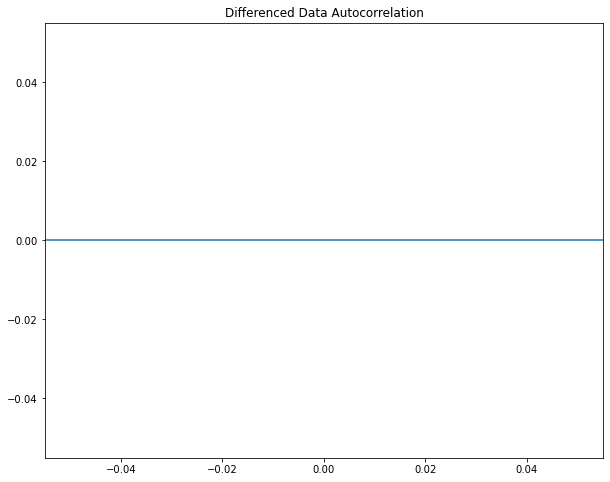

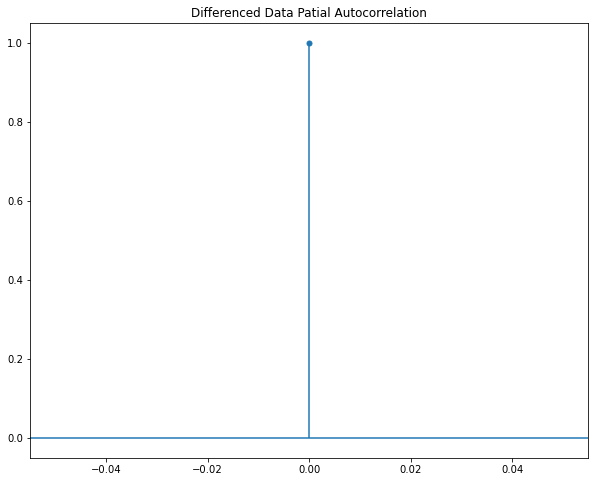

In [466]:
plot_acf(df2['Sparkling'].diff(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(df2['Sparkling'].diff(),lags=50,title='Differenced Data Patial Autocorrelation')
plt.show()

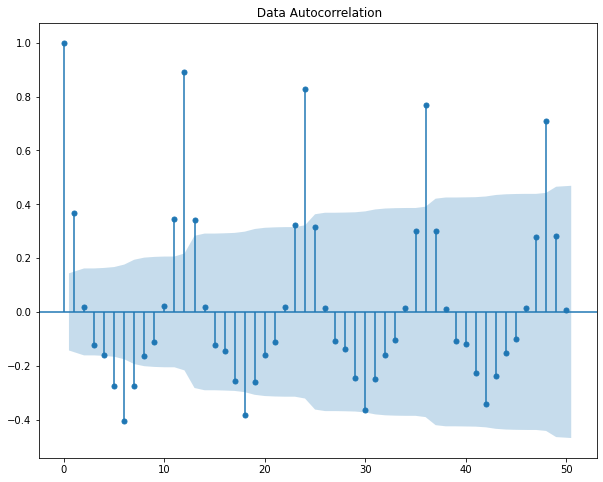

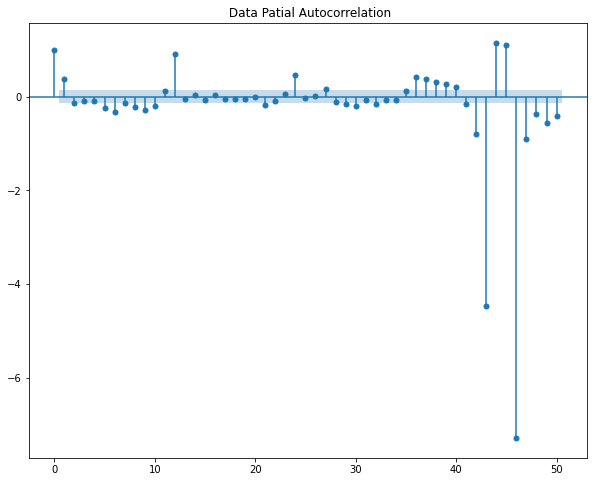

In [468]:
plot_acf(df2['Sparkling'],lags=50,title=' Data Autocorrelation')
plot_pacf(df2['Sparkling'],lags=50,title=' Data Patial Autocorrelation')
plt.show()

In [469]:
resultsDf.sort_values(by=['RMSE'])

,RMSE
Triple Exponential Smoothing,0.260576
Double Exponential Smoothing,0.346531
Simple Exponential Smoothing,0.557920
Auto SARIMA 6,601.254712
Auto SARIMA 6,607.216414
Moving Average - rolling 2,813.400684
Movinbg Average - rolling 4,1156.589694
Simple Average,1275.081804
Moving Average - rolling 6,1283.927428
Moving Average - rolling 9,1346.278315
